In [1]:
# Install the alpha_vantage library using pip
# This library provides an easy way to access Alpha Vantage's financial data API
!pip install alpha_vantage


Defaulting to user installation because normal site-packages is not writeable


### Fetching stock price data from Alpha Vantage, starting with JP Morgan (JPM)

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries  # Import the TimeSeries class from alpha_vantage for fetching stock time-series data

# Define the API key for Alpha Vantage
API_key = 'N47BZEOG7NENMOZM'

# Initialize the TimeSeries object with the API key and set output format to pandas DataFrame
ts = TimeSeries(key=API_key, output_format='pandas')

# Fetch monthly adjusted stock data for JP Morgan (JPM) from Alpha Vantage
jpm_data, jpm_metadata = ts.get_monthly_adjusted('JPM')

# Display the fetched data
jpm_data


In [ ]:
jpm_data.tail()

### Data Cleaning

In [19]:
jpm_data.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount'],
      dtype='object')

In [ ]:
jpm_data.reset_index(inplace=True)  # Reset the index so that 'date' becomes a regular column instead of being used as the index

In [194]:
jpm_data.columns

Index(['date', '1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount'],
      dtype='object')

In [195]:
# Rename columns to remove numeric prefixes and use descriptive names instead
jpm_data.columns = ['date', 'open', 'high', 'low', 'close', 'adjusted close', 'volume', 'dividend amount']
jpm_data


,date,open,high,low,close,adjusted close,volume,dividend amount
0,2024-08-19,213.20,215.53,190.90,215.45,215.4500,117345732.0,0.00
1,2024-07-31,202.84,217.56,202.10,212.80,212.8000,197456051.0,1.15
2,2024-06-28,202.31,202.60,190.88,202.26,201.1305,174902140.0,0.00
3,2024-05-31,192.27,205.88,188.46,202.63,201.4985,195902413.0,0.00
4,2024-04-30,199.99,200.94,179.20,191.74,190.6693,222243015.0,1.15
...,...,...,...,...,...,...,...,...
292,2000-04-28,87.94,93.00,71.75,72.12,22.8903,99979203.0,0.48
293,2000-03-31,79.88,100.75,77.13,87.19,27.5211,110318738.0,0.00
294,2000-02-29,82.44,86.37,74.56,79.62,25.1316,88645202.0,0.00
295,2000-01-31,74.75,81.50,68.25,80.69,25.4694,109109004.0,0.41


In [196]:
# Check for any missing values in the DataFrame
jpm_data.isnull().sum()

date               0
open               0
high               0
low                0
close              0
adjusted close     0
volume             0
dividend amount    0
dtype: int64

In [10]:
jpm_data.dtypes

date               datetime64[ns]
open                      float64
high                      float64
low                       float64
close                     float64
adjusted close            float64
volume                    float64
dividend amount           float64
dtype: object

# Economic indicators

## CPI

CPI reflects consumer purchasing power and is a key tool for governments and central banks in shaping economic policy. A rising CPI signals increasing inflation, potentially leading to interest rate adjustments to maintain stability. It influences business decisions on pricing, wages, and investments, while helping consumers understand changes in their purchasing power. Overall, CPI is a critical measure affecting many aspects of the economy.



In [11]:
#CPI(Consumer Price Index)
import requests
import pandas as pd

api_key = 'N47BZEOG7NENMOZM'
url = f'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={api_key}'

# Make the API request
response = requests.get(url)
data = response.json()


# Convert the JSON data to a pandas DataFrame
cpi_data = pd.DataFrame(data['data'])

cpi_data

,date,value
0,2024-07-01,314.540
1,2024-06-01,314.175
2,2024-05-01,314.069
3,2024-04-01,313.548
4,2024-03-01,312.332
...,...,...
1334,1913-05-01,9.700
1335,1913-04-01,9.800
1336,1913-03-01,9.800
1337,1913-02-01,9.800


### Data Cleaning

In [12]:
cpi_data.dtypes

date     object
value    object
dtype: object

In [16]:
# Convert the 'date' column to datetime format
cpi_data['date'] = pd.to_datetime(cpi_data['date'])


In [17]:
# Convert the 'value' column to numeric format
cpi_data['value'] = pd.to_numeric(cpi_data['value'], errors = 'coerce')
cpi_data


,date,value
0,2024-07-01,314.540
1,2024-06-01,314.175
2,2024-05-01,314.069
3,2024-04-01,313.548
4,2024-03-01,312.332
...,...,...
1334,1913-05-01,9.700
1335,1913-04-01,9.800
1336,1913-03-01,9.800
1337,1913-02-01,9.800


In [18]:
cpi_data.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [19]:
cpi_data['value'] = cpi_data['value'].round(2)
cpi_data

,date,value
0,2024-07-01,314.54
1,2024-06-01,314.18
2,2024-05-01,314.07
3,2024-04-01,313.55
4,2024-03-01,312.33
...,...,...
1334,1913-05-01,9.70
1335,1913-04-01,9.80
1336,1913-03-01,9.80
1337,1913-02-01,9.80


In [20]:
cpi_data.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [21]:
cpi_data.isnull().sum()

date     0
value    0
dtype: int64

In [22]:
# For stock prices (to ensure dates are end of the month)
jpm_data['date'] = pd.to_datetime(jpm_data['date']) + pd.offsets.MonthEnd(0)
# Filter the dataset to include data up to March 31, 2024, to align with the cutoff date for GDP per capita.
jpm_prices = jpm_data[(jpm_data['date']>='2000-01-31') & (jpm_data['date']<='2024-03-31')]
jpm_prices

,date,open,high,low,close,adjusted close,volume,dividend amount
6,2024-03-31,185.70,200.72,184.27,200.30,198.0176,165873396.0,0.00
7,2024-02-29,173.64,186.43,171.43,186.06,183.9398,154735805.0,0.00
8,2024-01-31,169.09,178.30,164.30,174.36,172.3732,231282257.0,1.05
9,2023-12-31,155.82,170.69,155.82,170.10,167.1379,182856749.0,0.00
10,2023-11-30,139.25,156.13,138.47,156.08,153.3620,162197963.0,0.00
...,...,...,...,...,...,...,...,...
292,2000-05-31,72.50,77.00,68.13,74.69,23.7060,103784871.0,0.00
293,2000-04-30,87.94,93.00,71.75,72.12,22.8903,99979203.0,0.48
294,2000-03-31,79.88,100.75,77.13,87.19,27.5211,110318738.0,0.00
295,2000-02-29,82.44,86.37,74.56,79.62,25.1316,88645202.0,0.00


In [23]:
# Export the transformed merged DataFrame to a CSV file for transfer into SQL,
jpm_prices.to_csv('jpm_prices.csv', index = False)

### As stock prices are recorded at the end of each month, the economic indicators data must also be adjusted to reflect end-of-month values."

In [20]:
# For cpi_data (to standardize to end of the month)
cpi_data['date'] = pd.to_datetime(cpi_data['date']) + pd.offsets.MonthEnd(0)

# Filter the dataset to include data up to March 31, 2024, to align with the cutoff date for GDP per capita
cpi= cpi_data[(cpi_data['date'] >= '2000-01-31') & (cpi_data['date'] <= '2024-03-31')]


In [21]:
cpi

,date,value
4,2024-03-31,312.33
5,2024-02-29,310.33
6,2024-01-31,308.42
7,2023-12-31,306.75
8,2023-11-30,307.05
...,...,...
290,2000-05-31,171.50
291,2000-04-30,171.30
292,2000-03-31,171.20
293,2000-02-29,169.80


## Unemployment

In [22]:
import requests
import pandas as pd

api_key = 'N47BZEOG7NENMOZM'
url = f'https://www.alphavantage.co/query?function=UNEMPLOYMENT&interval=monthly&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Convert the JSON data to a pandas DataFrame
unemployment_data = pd.DataFrame(data['data'])

unemployment_data


,date,value
0,2024-07-01,4.3
1,2024-06-01,4.1
2,2024-05-01,4.0
3,2024-04-01,3.9
4,2024-03-01,3.8
...,...,...
914,1948-05-01,3.5
915,1948-04-01,3.9
916,1948-03-01,4.0
917,1948-02-01,3.8


### Data cleaning

In [23]:
unemployment_data.dtypes

date     object
value    object
dtype: object

In [24]:
# Convert date column into datetime format
unemployment_data['date'] = pd.to_datetime(unemployment_data['date'])

In [25]:
unemployment_data['value'] = pd.to_numeric(unemployment_data['value'], errors = 'coerce')


In [26]:
unemployment_data.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [27]:
unemployment_data.isnull().sum()

date     0
value    0
dtype: int64

In [28]:
unemployment_data['value'] = unemployment_data['value'].round(2)
unemployment_data

,date,value
0,2024-07-01,4.3
1,2024-06-01,4.1
2,2024-05-01,4.0
3,2024-04-01,3.9
4,2024-03-01,3.8
...,...,...
914,1948-05-01,3.5
915,1948-04-01,3.9
916,1948-03-01,4.0
917,1948-02-01,3.8


In [29]:
# For economic indicators (standardize to end of the month)
unemployment_data['date'] = pd.to_datetime(unemployment_data['date']) + pd.offsets.MonthEnd(0)
unemployment_data

,date,value
0,2024-07-31,4.3
1,2024-06-30,4.1
2,2024-05-31,4.0
3,2024-04-30,3.9
4,2024-03-31,3.8
...,...,...
914,1948-05-31,3.5
915,1948-04-30,3.9
916,1948-03-31,4.0
917,1948-02-29,3.8


In [30]:
#Filter the dataset
unemployment = unemployment_data[(unemployment_data['date']>= '2000-01-31')& (unemployment_data['date']<= '2024-03-31')]
unemployment

,date,value
4,2024-03-31,3.8
5,2024-02-29,3.9
6,2024-01-31,3.7
7,2023-12-31,3.7
8,2023-11-30,3.7
...,...,...
290,2000-05-31,4.0
291,2000-04-30,3.8
292,2000-03-31,4.0
293,2000-02-29,4.1


In [31]:
# Retail Sales

import requests
import pandas as pd

api_key = 'N47BZEOG7NENMOZM'
url = f'https://www.alphavantage.co/query?function=RETAIL_SALES&interval=monthly&apikey={api_key}'

response = requests.get(url)
data = response.json()

# Convert the JSON data to a pandas DataFrame
retail_sales = pd.DataFrame(data['data'])

retail_sales


,date,value
0,2024-07-01,627510.0
1,2024-06-01,604742.0
2,2024-05-01,643843.0
3,2024-04-01,605419.0
4,2024-03-01,609462.0
...,...,...
386,1992-05-01,152420
387,1992-04-01,147175
388,1992-03-01,142488
389,1992-02-01,131244


### Data cleaning

In [32]:
retail_sales.dtypes

date     object
value    object
dtype: object

In [33]:
#Convert date column  into datetime format
retail_sales['date'] = pd.to_datetime(retail_sales['date'])

In [34]:
# Convert value column into numeric format
retail_sales['value'] = pd.to_numeric(retail_sales['value'], errors = 'coerce')

In [35]:
retail_sales.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [36]:
retail_sales.isnull().sum()

date     0
value    0
dtype: int64

In [37]:
# For economic indicators (standardize to end of the month)
retail_sales['date'] = retail_sales['date'] + pd.offsets.MonthEnd(0)

In [38]:
retail_sales

,date,value
0,2024-07-31,627510.0
1,2024-06-30,604742.0
2,2024-05-31,643843.0
3,2024-04-30,605419.0
4,2024-03-31,609462.0
...,...,...
386,1992-05-31,152420.0
387,1992-04-30,147175.0
388,1992-03-31,142488.0
389,1992-02-29,131244.0


In [39]:
# Filter the retail_sales dataset
retail_sales = retail_sales[(retail_sales['date']>= '2000-01-31') & (retail_sales['date']<= '2024-03-31')]
retail_sales

,date,value
4,2024-03-31,609462.0
5,2024-02-29,555528.0
6,2024-01-31,552441.0
7,2023-12-31,668957.0
8,2023-11-30,619189.0
...,...,...
290,2000-05-31,257581.0
291,2000-04-30,239051.0
292,2000-03-31,253717.0
293,2000-02-29,227087.0


In [40]:
#  Federal Funds(Interest) Rate

import requests
import pandas as pd

api_key = 'N47BZEOG7NENMOZM'
url = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey={api_key}'

response = requests.get(url)
data = response.json()

response.json()

federal_funds_rate = pd.DataFrame(data['data'])
federal_funds_rate



,date,value
0,2024-07-01,5.33
1,2024-06-01,5.33
2,2024-05-01,5.33
3,2024-04-01,5.33
4,2024-03-01,5.33
...,...,...
836,1954-11-01,0.83
837,1954-10-01,0.85
838,1954-09-01,1.07
839,1954-08-01,1.22


In [41]:
federal_funds_rate.dtypes

date     object
value    object
dtype: object

In [42]:
federal_funds_rate['date'] = pd.to_datetime(federal_funds_rate['date'])

In [43]:
federal_funds_rate['value'] = pd.to_numeric(federal_funds_rate['value'], errors = 'coerce')

In [44]:
federal_funds_rate.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [45]:
federal_funds_rate.isnull().sum()

date     0
value    0
dtype: int64

In [46]:
# For economic indicators (standardize to end of the month)
federal_funds_rate['date'] = federal_funds_rate['date'] + pd.offsets.MonthEnd(0)

In [47]:
federal_funds_rate

,date,value
0,2024-07-31,5.33
1,2024-06-30,5.33
2,2024-05-31,5.33
3,2024-04-30,5.33
4,2024-03-31,5.33
...,...,...
836,1954-11-30,0.83
837,1954-10-31,0.85
838,1954-09-30,1.07
839,1954-08-31,1.22


In [48]:
# Filter the dataset
federal_funds_rate = federal_funds_rate[(federal_funds_rate['date']>= '2000-01-31') & (federal_funds_rate['date']<= '2024-03-31')]

In [49]:
federal_funds_rate

,date,value
4,2024-03-31,5.33
5,2024-02-29,5.33
6,2024-01-31,5.33
7,2023-12-31,5.33
8,2023-11-30,5.33
...,...,...
290,2000-05-31,6.27
291,2000-04-30,6.02
292,2000-03-31,5.85
293,2000-02-29,5.73


## Real GDP PER CAPITA
### GDP per capita is a useful economic indicator that provides an average measure of economic output or income per person, helping gauge overall economic performance and living standards. 


In [50]:
#  Real GDP Per Capita

import requests
import pandas as pd

api_key = 'N47BZEOG7NENMOZM'
url = 'https://www.alphavantage.co/query?function=REAL_GDP_PER_CAPITA&interval = monthly&apikey={}'

response = requests.get(url)
data = response.json()

response.json()

real_gdp_per_capita = pd.DataFrame(data['data'])
real_gdp_per_capita
                              


,date,value
0,2024-04-01,68070.0
1,2024-01-01,67672.0
2,2023-10-01,67513.0
3,2023-07-01,67050.0
4,2023-04-01,66357.0
...,...,...
305,1948-01-01,15371.0
306,1947-10-01,15204.0
307,1947-07-01,15039.0
308,1947-04-01,15139.0


In [51]:
# Convert 'date' column to datetime
real_gdp_per_capita['date'] = pd.to_datetime(real_gdp_per_capita['date'])
real_gdp_per_capita


,date,value
0,2024-04-01,68070.0
1,2024-01-01,67672.0
2,2023-10-01,67513.0
3,2023-07-01,67050.0
4,2023-04-01,66357.0
...,...,...
305,1948-01-01,15371.0
306,1947-10-01,15204.0
307,1947-07-01,15039.0
308,1947-04-01,15139.0


In [52]:
real_gdp_per_capita.dtypes

date     datetime64[ns]
value            object
dtype: object

In [53]:
# Convert value column to numeric datatype
real_gdp_per_capita['value'] = pd.to_numeric(real_gdp_per_capita['value'], errors = 'coerce')
real_gdp_per_capita.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [54]:
# Set 'date' as the index
real_gdp_per_capita.set_index('date', inplace=True)
real_gdp_per_capita

,value
date,
2024-04-01,68070.0
2024-01-01,67672.0
2023-10-01,67513.0
2023-07-01,67050.0
2023-04-01,66357.0
...,...
1948-01-01,15371.0
1947-10-01,15204.0
1947-07-01,15039.0


In [55]:
# Resample to quarterly frequency, using forward fill to align existing dates to quarter-end
real_gdp_per_capita_quarterly = real_gdp_per_capita.resample('Q').ffill()

# Confirm the date alignment
print("Aligned Data Head:")
print(real_gdp_per_capita_quarterly.head())


Aligned Data Head:
              value
date               
1947-03-31  15248.0
1947-06-30  15139.0
1947-09-30  15039.0
1947-12-31  15204.0
1948-03-31  15371.0


In [56]:
# Resample to monthly frequency, using linear interpolation
real_gdp_per_capita_monthly = real_gdp_per_capita_quarterly.resample('M').interpolate(method='linear')

# Confirm the monthly resampling
print("Monthly Resampled Data Head:")
print(real_gdp_per_capita_monthly.head(20))


Monthly Resampled Data Head:
                   value
date                    
1947-03-31  15248.000000
1947-04-30  15211.666667
1947-05-31  15175.333333
1947-06-30  15139.000000
1947-07-31  15105.666667
1947-08-31  15072.333333
1947-09-30  15039.000000
1947-10-31  15094.000000
1947-11-30  15149.000000
1947-12-31  15204.000000
1948-01-31  15259.666667
1948-02-29  15315.333333
1948-03-31  15371.000000
1948-04-30  15435.000000
1948-05-31  15499.000000
1948-06-30  15563.000000
1948-07-31  15570.333333
1948-08-31  15577.666667
1948-09-30  15585.000000
1948-10-31  15566.666667


In [57]:
# Sort the DataFrame from newest to oldest
real_gdp_per_capita_monthly_sorted = real_gdp_per_capita_monthly.sort_index(ascending=False)

# Display the sorted DataFrame
print("Sorted Monthly Data (Newest to Oldest):")
print(real_gdp_per_capita_monthly_sorted.head(20))


Sorted Monthly Data (Newest to Oldest):
                   value
date                    
2024-06-30  68070.000000
2024-05-31  67937.333333
2024-04-30  67804.666667
2024-03-31  67672.000000
2024-02-29  67619.000000
2024-01-31  67566.000000
2023-12-31  67513.000000
2023-11-30  67358.666667
2023-10-31  67204.333333
2023-09-30  67050.000000
2023-08-31  66819.000000
2023-07-31  66588.000000
2023-06-30  66357.000000
2023-05-31  66270.000000
2023-04-30  66183.000000
2023-03-31  66096.000000
2023-02-28  65997.000000
2023-01-31  65898.000000
2022-12-31  65799.000000
2022-11-30  65689.000000


In [58]:
# Reset the index to move 'date' from the index to a regular column
real_gdp_per_capita = real_gdp_per_capita_monthly_sorted.reset_index()
real_gdp_per_capita

,date,value
0,2024-06-30,68070.000000
1,2024-05-31,67937.333333
2,2024-04-30,67804.666667
3,2024-03-31,67672.000000
4,2024-02-29,67619.000000
...,...,...
923,1947-07-31,15105.666667
924,1947-06-30,15139.000000
925,1947-05-31,15175.333333
926,1947-04-30,15211.666667


In [59]:
real_gdp_per_capita.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [60]:
real_gdp_per_capita.isnull().sum()

date     0
value    0
dtype: int64

In [61]:
# Filter the dataset
real_gdp_per_capita = real_gdp_per_capita[(real_gdp_per_capita['date']>= '2000-01-31') & (real_gdp_per_capita['date']<= '2024-03-31')]

real_gdp_per_capita                      

,date,value
3,2024-03-31,67672.000000
4,2024-02-29,67619.000000
5,2024-01-31,67566.000000
6,2023-12-31,67513.000000
7,2023-11-30,67358.666667
...,...,...
289,2000-05-31,49851.000000
290,2000-04-30,49593.000000
291,2000-03-31,49335.000000
292,2000-02-29,49317.000000


In [62]:
# Round the 'Values' column to 2 decimal places
pd.set_option('mode.chained_assignment', None)  # Turn off the warning
real_gdp_per_capita['value'] = real_gdp_per_capita['value'].round(2)
real_gdp_per_capita 


,date,value
3,2024-03-31,67672.00
4,2024-02-29,67619.00
5,2024-01-31,67566.00
6,2023-12-31,67513.00
7,2023-11-30,67358.67
...,...,...
289,2000-05-31,49851.00
290,2000-04-30,49593.00
291,2000-03-31,49335.00
292,2000-02-29,49317.00


In [63]:
#  Treasury Yield

import requests
import pandas as pd

api_key = 'N47BZEOG7NENMOZM'
url ='https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=monthly&maturity=10year&apikey={}'

response = requests.get(url)
data = response.json()

response.json()

treasury_yield = pd.DataFrame(data['data'])
treasury_yield



,date,value
0,2024-07-01,4.25
1,2024-06-01,4.31
2,2024-05-01,4.48
3,2024-04-01,4.54
4,2024-03-01,4.21
...,...,...
851,1953-08-01,2.95
852,1953-07-01,2.93
853,1953-06-01,3.11
854,1953-05-01,3.05


In [64]:
# Data Cleaning
treasury_yield.dtypes

date     object
value    object
dtype: object

In [65]:
#Convert date column  into datetime
treasury_yield['date'] = pd.to_datetime(treasury_yield['date'])

In [66]:
treasury_yield.dtypes

date     datetime64[ns]
value            object
dtype: object

In [67]:
treasury_yield['value'] = pd.to_numeric(treasury_yield['value'], errors='coerce')
treasury_yield


,date,value
0,2024-07-01,4.25
1,2024-06-01,4.31
2,2024-05-01,4.48
3,2024-04-01,4.54
4,2024-03-01,4.21
...,...,...
851,1953-08-01,2.95
852,1953-07-01,2.93
853,1953-06-01,3.11
854,1953-05-01,3.05


In [68]:
treasury_yield.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [69]:
treasury_yield['value'] = treasury_yield['value'].round(2)
treasury_yield

,date,value
0,2024-07-01,4.25
1,2024-06-01,4.31
2,2024-05-01,4.48
3,2024-04-01,4.54
4,2024-03-01,4.21
...,...,...
851,1953-08-01,2.95
852,1953-07-01,2.93
853,1953-06-01,3.11
854,1953-05-01,3.05


In [70]:
treasury_yield.isnull().sum()

date     0
value    0
dtype: int64

In [71]:
treasury_yield['date'] = treasury_yield['date']+ pd.offsets.MonthEnd(0)
treasury_yield

,date,value
0,2024-07-31,4.25
1,2024-06-30,4.31
2,2024-05-31,4.48
3,2024-04-30,4.54
4,2024-03-31,4.21
...,...,...
851,1953-08-31,2.95
852,1953-07-31,2.93
853,1953-06-30,3.11
854,1953-05-31,3.05


In [72]:
treasury_yield = treasury_yield[(treasury_yield['date']>= '2000-01-31') &(treasury_yield['date']<= '2024-03-31')]
treasury_yield

,date,value
4,2024-03-31,4.21
5,2024-02-29,4.21
6,2024-01-31,4.06
7,2023-12-31,4.02
8,2023-11-30,4.50
...,...,...
290,2000-05-31,6.44
291,2000-04-30,5.99
292,2000-03-31,6.26
293,2000-02-29,6.52


In [73]:
# Durables
import requests
import pandas as pd

api_key = 'N47BZEOG7NENMOZM'
url = 'https://www.alphavantage.co/query?function=DURABLES&interval=monthly&apikey={}'

response = requests.get(url)
data = response.json()

response.json()

durables = pd.DataFrame(data['data'])
durables



,date,value
0,2024-06-01,287840.0
1,2024-05-01,284736.0
2,2024-04-01,275566.0
3,2024-03-01,305526.0
4,2024-02-01,268258.0
...,...,...
384,1992-06-01,131268
385,1992-05-01,122274
386,1992-04-01,123268
387,1992-03-01,129309


In [74]:
# Data Cleaning
durables.dtypes

date     object
value    object
dtype: object

In [75]:
# Convert date into datetime
durables['date'] = pd.to_datetime(durables['date'])

In [76]:
# Convert value into numeric format
durables['value'] = pd.to_numeric(durables['value'], errors ='coerce')

In [77]:
durables.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [78]:
durables.isnull().sum()

date     0
value    0
dtype: int64

In [79]:
durables['value'] = durables['value'].round(2)
durables

,date,value
0,2024-06-01,287840.0
1,2024-05-01,284736.0
2,2024-04-01,275566.0
3,2024-03-01,305526.0
4,2024-02-01,268258.0
...,...,...
384,1992-06-01,131268.0
385,1992-05-01,122274.0
386,1992-04-01,123268.0
387,1992-03-01,129309.0


In [80]:
durables['date'] = durables['date'] + pd.offsets.MonthEnd(0)
durables

,date,value
0,2024-06-30,287840.0
1,2024-05-31,284736.0
2,2024-04-30,275566.0
3,2024-03-31,305526.0
4,2024-02-29,268258.0
...,...,...
384,1992-06-30,131268.0
385,1992-05-31,122274.0
386,1992-04-30,123268.0
387,1992-03-31,129309.0


In [81]:
durables.dtypes


date     datetime64[ns]
value           float64
dtype: object

In [82]:
durables

,date,value
0,2024-06-30,287840.0
1,2024-05-31,284736.0
2,2024-04-30,275566.0
3,2024-03-31,305526.0
4,2024-02-29,268258.0
...,...,...
384,1992-06-30,131268.0
385,1992-05-31,122274.0
386,1992-04-30,123268.0
387,1992-03-31,129309.0


In [83]:
durables = durables[(durables['date']>= '2000-01-31') &(durables['date']<= '2024-03-31')]
durables

,date,value
3,2024-03-31,305526.0
4,2024-02-29,268258.0
5,2024-01-31,252522.0
6,2023-12-31,299969.0
7,2023-11-30,286515.0
...,...,...
289,2000-05-31,190188.0
290,2000-04-30,186872.0
291,2000-03-31,212974.0
292,2000-02-29,189153.0


In [84]:
#Nonfarm Payroll

import requests
import pandas as pd

api_key = 'N47BZEOG7NENMOZM'

# URL with formatted API key
url = f'https://www.alphavantage.co/query?function=NONFARM_PAYROLL&interval=monthly&apikey={api_key}'

# Fetch the data
response = requests.get(url)
data = response.json()

data

{'name': 'Total Nonfarm Payroll',
 'interval': 'monthly',
 'unit': 'thousands of persons',
 'data': [{'date': '2024-07-01', 'value': '158445'},
  {'date': '2024-06-01', 'value': '159360'},
  {'date': '2024-05-01', 'value': '158842'},
  {'date': '2024-04-01', 'value': '158001'},
  {'date': '2024-03-01', 'value': '157210'},
  {'date': '2024-02-01', 'value': '156551'},
  {'date': '2024-01-01', 'value': '155432'},
  {'date': '2023-12-01', 'value': '158269'},
  {'date': '2023-11-01', 'value': '158347'},
  {'date': '2023-10-01', 'value': '157878'},
  {'date': '2023-09-01', 'value': '156845'},
  {'date': '2023-08-01', 'value': '156355'},
  {'date': '2023-07-01', 'value': '155981'},
  {'date': '2023-06-01', 'value': '156842'},
  {'date': '2023-05-01', 'value': '156132'},
  {'date': '2023-04-01', 'value': '155201'},
  {'date': '2023-03-01', 'value': '154253'},
  {'date': '2023-02-01', 'value': '153817'},
  {'date': '2023-01-01', 'value': '152688'},
  {'date': '2022-12-01', 'value': '155211'},
 

In [85]:
nonfarm_payroll = pd.DataFrame(data['data'])
nonfarm_payroll


,date,value
0,2024-07-01,158445
1,2024-06-01,159360
2,2024-05-01,158842
3,2024-04-01,158001
4,2024-03-01,157210
...,...,...
1022,1939-05-01,30145
1023,1939-04-01,29786
1024,1939-03-01,29804
1025,1939-02-01,29394


In [86]:
nonfarm_payroll.dtypes

date     object
value    object
dtype: object

In [89]:
#Convert date into datetime
nonfarm_payroll['date'] = pd.to_datetime(nonfarm_payroll['date'])


In [90]:
nonfarm_payroll['value'] = pd.to_numeric(nonfarm_payroll['value'], errors = 'coerce')
                                

In [91]:
nonfarm_payroll.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [92]:
nonfarm_payroll.isnull().sum()

date     0
value    0
dtype: int64

In [93]:
nonfarm_payroll['date'] = nonfarm_payroll['date'] + pd.offsets.MonthEnd(0)
nonfarm_payroll

,date,value
0,2024-07-31,158445
1,2024-06-30,159360
2,2024-05-31,158842
3,2024-04-30,158001
4,2024-03-31,157210
...,...,...
1022,1939-05-31,30145
1023,1939-04-30,29786
1024,1939-03-31,29804
1025,1939-02-28,29394


In [94]:
nonfarm_payroll= nonfarm_payroll[(nonfarm_payroll['date']>= '2000-01-31') &(nonfarm_payroll['date']<= '2024-03-31')]
nonfarm_payroll

,date,value
4,2024-03-31,157210
5,2024-02-29,156551
6,2024-01-31,155432
7,2023-12-31,158269
8,2023-11-30,158347
...,...,...
290,2000-05-31,132706
291,2000-04-30,131749
292,2000-03-31,130752
293,2000-02-29,129655


## Merge datasets(Stock prices and Economic Indicators)

In [95]:
import pandas as pd

pd.set_option('mode.chained_assignment', None)  # Turn off the warning

# Renaming 'value' columns in each DataFrame
cpi.rename(columns={'value': 'cpi_value'}, inplace=True)
unemployment.rename(columns={'value': 'unemployment_value'}, inplace=True)
retail_sales.rename(columns={'value': 'retail_sales_value'}, inplace=True)
federal_funds_rate.rename(columns={'value': 'federal_funds_rate_value'}, inplace=True)
real_gdp_per_capita.rename(columns={'value': 'gdp_value'}, inplace=True)
treasury_yield.rename(columns={'value': 'treasury_yield_value'}, inplace=True)
durables.rename(columns={'value': 'durables_value'}, inplace=True)
nonfarm_payroll.rename(columns={'value': 'nonfarm_payroll_value'}, inplace=True)

# Merge datasets on 'date'
merged_data = jpm_prices
merged_data = merged_data.merge(cpi, on='date', how='left')
merged_data = merged_data.merge(unemployment, on='date', how='left')
merged_data = merged_data.merge(retail_sales, on='date', how='left')
merged_data = merged_data.merge(federal_funds_rate, on='date', how='left')
merged_data = merged_data.merge(real_gdp_per_capita, on='date', how='left')
merged_data = merged_data.merge(treasury_yield, on='date', how='left')
merged_data = merged_data.merge(durables, on='date', how='left')
merged_data = merged_data.merge(nonfarm_payroll, on='date', how='left')

merged_data


,date,open,high,low,close,adjusted close,volume,dividend amount,cpi_value,unemployment_value,retail_sales_value,federal_funds_rate_value,gdp_value,treasury_yield_value,durables_value,nonfarm_payroll_value
0,2024-03-31,185.70,200.72,184.27,200.30,198.0176,165873396.0,0.00,312.33,3.8,609462.0,5.33,67672.00,4.21,305526.0,157210
1,2024-02-29,173.64,186.43,171.43,186.06,183.9398,154735805.0,0.00,310.33,3.9,555528.0,5.33,67619.00,4.21,268258.0,156551
2,2024-01-31,169.09,178.30,164.30,174.36,172.3732,231282257.0,1.05,308.42,3.7,552441.0,5.33,67566.00,4.06,252522.0,155432
3,2023-12-31,155.82,170.69,155.82,170.10,167.1379,182856749.0,0.00,306.75,3.7,668957.0,5.33,67513.00,4.02,299969.0,158269
4,2023-11-30,139.25,156.13,138.47,156.08,153.3620,162197963.0,0.00,307.05,3.7,619189.0,5.33,67358.67,4.50,286515.0,158347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2000-05-31,72.50,77.00,68.13,74.69,23.7060,103784871.0,0.00,171.50,4.0,257581.0,6.27,49851.00,6.44,190188.0,132706
287,2000-04-30,87.94,93.00,71.75,72.12,22.8903,99979203.0,0.48,171.30,3.8,239051.0,6.02,49593.00,5.99,186872.0,131749
288,2000-03-31,79.88,100.75,77.13,87.19,27.5211,110318738.0,0.00,171.20,4.0,253717.0,5.85,49335.00,6.26,212974.0,130752
289,2000-02-29,82.44,86.37,74.56,79.62,25.1316,88645202.0,0.00,169.80,4.1,227087.0,5.73,49317.00,6.52,189153.0,129655


### Exploratory Data Analysis


In [96]:
merged_data.isnull().sum()

date                        0
open                        0
high                        0
low                         0
close                       0
adjusted close              0
volume                      0
dividend amount             0
cpi_value                   0
unemployment_value          0
retail_sales_value          0
federal_funds_rate_value    0
gdp_value                   0
treasury_yield_value        0
durables_value              0
nonfarm_payroll_value       0
dtype: int64

In [291]:
merged_data.dtypes

date                        datetime64[ns]
open                               float64
high                               float64
low                                float64
close                              float64
adjusted close                     float64
volume                             float64
dividend amount                    float64
cpi_value                          float64
unemployment_value                 float64
retail_sales_value                 float64
federal_funds_rate_value           float64
gdp_value                          float64
treasury_yield_value               float64
durables_value                     float64
nonfarm_payroll_value                int64
dtype: object

In [292]:
merged_data.describe()

,date,open,high,low,close,adjusted close,volume,dividend amount,cpi_value,unemployment_value,retail_sales_value,federal_funds_rate_value,gdp_value,treasury_yield_value,durables_value,nonfarm_payroll_value
count,291,291.000000,291.000000,291.000000,291.000000,291.000000,2.910000e+02,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,2012-02-29 13:16:42.061855744,68.334674,72.548349,64.053588,68.608485,54.046333,4.157661e+08,0.163746,227.297595,5.743299,376797.573883,1.821821,56851.635739,3.254536,216021.000000,139143.292096
min,2000-01-31 00:00:00,19.150000,21.610000,14.960000,18.990000,10.102200,8.414930e+07,0.000000,168.800000,3.400000,213709.000000,0.050000,49299.000000,0.620000,137245.000000,127804.000000
25%,2006-02-14 00:00:00,39.220000,41.435000,36.505000,38.915000,23.650350,2.198244e+08,0.000000,199.000000,4.300000,300140.000000,0.140000,53570.835000,2.180000,188652.000000,132003.000000
50%,2012-02-29 00:00:00,48.530000,51.950000,46.050000,48.450000,31.194700,2.886162e+08,0.000000,227.660000,5.200000,351667.000000,1.150000,55555.000000,3.170000,216692.000000,137077.000000
75%,2018-03-15 12:00:00,96.485000,104.830000,91.245000,96.975000,85.425600,4.663723e+08,0.340000,249.270000,6.650000,427085.000000,2.885000,60406.000000,4.245000,237790.000000,145402.000000
max,2024-03-31 00:00:00,185.700000,200.720000,184.270000,200.300000,198.017600,2.805951e+09,1.050000,312.330000,14.800000,668957.000000,6.540000,67672.000000,6.660000,324238.000000,158347.000000
std,NaN,39.592825,41.719643,38.214758,40.214852,41.984018,3.442905e+08,0.282258,35.661881,1.971517,103251.672146,1.973199,4898.857162,1.310895,35843.422261,8099.089625


## Insights

### Average(Mean):

CPI Value: The average Consumer Price Index (CPI) value is 227.30, indicating that inflation has been relatively low over the period. With the base CPI in the year 2000 set at 168, this represents an average increase of 127% in CPI. To determine the compounded annual inflation rate, we use the formula: ((endvalue/beg.value)**1/n)-1

((227/168)**1/24)−1, which yields an average annual inflation rate of approximately 1.38%.

Unemployment Value: The average unemployment rate is 5.74%, indicating a moderate labor rate.  This rate is indicative of a functioning economy where the labor market is neither overheated nor in severe distress. It typically means that the economy is creating jobs at a pace that keeps unemployment within a reasonable range.

Federal Funds Rate: The average federal funds rate of 1.82% reflects the impact of prolonged periods of low rates (0-1%) due to the financial crisis and the COVID-19 pandemic. These periods of exceptionally low rates skew the average rate downward, even though there were higher rates at other times.

Real GDP PER CAPITA: Real GDP per capita of $57,228.81 indicates a stable and high standard of living, adjusted for inflation. It reflects consistent income levels and economic performance, giving a clearer picture of how individual purchasing power has evolved over time.

Treasury Yield: 
The mean treasury yield of 3.25% reflects the average return investors received on U.S. government bonds over the period. This rate is influenced by various factors, including:

Economic Conditions: Treasury yields tend to rise in strong economies as demand for credit increases and inflation expectations grow. Conversely, they fall during economic downturns when investors seek the safety of government bonds, driving up prices and pushing yields lower.

Monetary Policy: The Federal Reserve’s actions directly impact treasury yields. Lower interest rates, often set to stimulate the economy, generally lead to lower yields. Conversely, when the Fed raises rates to curb inflation, treasury yields often increase.

Inflation Expectations: Higher expected inflation typically leads to higher yields as investors demand greater compensation for the decreasing purchasing power of future interest payments.

Market Sentiment and Risk: During periods of uncertainty or financial instability, investors flock to safe assets like U.S. treasuries, increasing their prices and reducing yields. Conversely, in stable times, they may seek higher returns elsewhere, reducing demand for treasuries and increasing yields.

The average yield of 3.25% suggests a balance between these factors over time, indicating periods of both economic stability and volatility. It also reflects the relatively low-risk nature of government bonds, which offer modest but secure returns.

##### Important observation:

I observed that Treasury yields were between 0% and 1% during the periods from 2008 to 2017 and again from 2020 to 2022, while they were higher during other times, leading to a moderate overall average. This pattern mirrors what I noticed when analyzing the Federal Funds Rate, highlighting that the two often move in tandem.


 Durables Value: The average value for durable goods is 216,021, suggesting a consistent demand for long-lasting goods.
Durable goods are products designed to last for an extended period, typically over three years. This category includes items like automobiles, appliances, and machinery. These goods are generally more expensive and are purchased less frequently than non-durable goods, such as food or clothing.

observations:

Consistent Demand: The average value of durable goods at $216,021 suggests stable demand for long-lasting products. This indicates that consumers and businesses have been consistently investing in items that offer long-term value.

Economic Indicator: High values in durable goods can signal confidence in the economy, as consumers and businesses are willing to make substantial purchases. Conversely, a significant drop in durable goods spending might indicate economic uncertainty or reduced consumer confidence.

Impact on Economic Growth: Investment in durable goods often correlates with economic expansion. For instance, a rise in durable goods orders may suggest businesses are investing in equipment and infrastructure, potentially leading to increased production and economic growth.

Consumer Behavior: When consumers are confident about their financial future, they are more likely to spend on durable goods. Thus, trends in durable goods can reflect broader consumer sentiment and economic conditions.

Overall, the stable average value for durable goods suggests a steady level of investment in long-lasting products, reflecting moderate economic stability and consumer confidence.


Nonfarm Payroll Value: The average nonfarm payroll value is 139,143, reflecting the average number of jobs over time.
Nonfarm Payrolls refer to the total number of paid workers in the U.S. economy, excluding employees in the following sectors:

Agriculture: Seasonal and other agricultural workers
Government: Federal, state, and local government employees
Private Household: Domestic workers like housekeepers
Some Nonprofit Organizations: Certain nonprofit organizations are also excluded
Nonfarm Payrolls are a crucial component of the U.S. monthly employment report, known as the Employment Situation Report, released by the Bureau of Labor Statistics (BLS). This metric provides insights into the overall health of the economy and the labor market.

Average Nonfarm Payroll Value
Nonfarm Payroll Value: The average nonfarm payroll value is 139,143.

observations:
Economic Activity Indicator: An average nonfarm payroll of 139,143 suggests a broad measure of employment in the economy. It reflects the total number of jobs added or lost each month, providing insight into economic activity and labor market strength.

Growth Trends: A higher average nonfarm payroll indicates a growing job market, which can be a sign of economic expansion and increasing demand for labor. Conversely, lower values might indicate economic slowdown or job losses.

Sector Performance: The average value helps understand which sectors are expanding or contracting. For instance, consistent increases in nonfarm payrolls often correlate with economic growth and recovery.

Policy Implications: Policymakers and central banks use nonfarm payroll data to assess economic health and make decisions about interest rates and economic policies. Strong employment figures might lead to tightening of monetary policy, while weak figures could prompt stimulus measures.

Economic Health: Nonfarm payrolls are a key economic indicator because they directly reflect labor market trends, which affect consumer spending and overall economic health.

Overall, the average nonfarm payroll value provides a snapshot of employment trends in the economy, highlighting job market conditions and helping in economic planning and policy-making.

Nonfarm Payroll Trends:

2020 Job Losses:

January 2020: Nonfarm payroll data showed a loss of 2,789 jobs. This decline was indicative of the early impacts of the COVID-19 pandemic on the job market.
Subsequent Volatility: Throughout 2020 and into early 2021, nonfarm payrolls experienced significant fluctuations as businesses adapted to lockdowns, restrictions, and changing economic conditions.

2008-2010 Economic Downturn:

Global Financial Crisis: Similar to the COVID-19 pandemic, the 2008 financial crisis led to substantial job losses and volatility in nonfarm payroll data.
Recovery Phase: Following the initial shock, the job market showed slow and uneven recovery as the economy stabilized and began to grow again.

Post-Pandemic Recovery:

Improvement Starting in Mid-2022: From May 2022 onward, there was a notable improvement in nonfarm payroll figures, reflecting a broader economic recovery and stabilization after the pandemic’s peak.
Insights:
Economic Shocks and Recoveries:

Both the 2008 financial crisis and the COVID-19 pandemic led to initial job losses followed by periods of volatility. These events underscore the impact of severe economic disruptions on employment.

Job Market Resilience:

The consistent up and down patterns in nonfarm payrolls during these periods highlight the economy's resilience and the gradual process of recovery following economic shocks.

Recovery Indicators:

The stabilization and subsequent improvement in nonfarm payroll figures from mid-2022 indicate a recovering job market, as businesses resumed operations and economic conditions improved.
Policy Implications:

These trends provide valuable information for policymakers regarding the timing and scale of economic interventions needed to support job creation and economic stability during and after crises.
Overall, the patterns in nonfarm payroll data reflect the broader economic impacts of financial crises and pandemics, showing how employment figures can be volatile during periods of economic upheaval but also how they can recover as conditions stabilize.


Retail Sales

Economic Growth Indicator: Strong retail sales indicate robust consumer spending, which is a key driver of economic growth. When the economy is growing, businesses and consumers are more likely to borrow money for expansion and purchases, respectively. This leads to higher demand for loans, credit cards, and mortgages, boosting banks' revenue.

Loan Demand: If retail sales are increasing, it suggests that consumers are confident and may be more likely to take out loans, whether for homes, cars, or personal needs. 

The fall in retail sales during the early 2000s was a direct result of the broader economic slowdown triggered by the dot-com bubble burst and associated events. Reduced consumer confidence, higher borrowing costs, and the impact of market volatility all contributed to decreased consumer spending, which in turn led to lower retail sales.


Max retail sales was recorded on 31.12.2023. Retail sales often peak in December due to holiday shopping, where consumers spend more on gifts, travel, and celebrations. The surge in sales at the end of the year is common as people take advantage of holiday deals, bonuses, and the festive season's spending mood.

### Standard Deviation (std):


Stock Prices: High standard deviation in stock prices (around 41 for adjusted close) indicates significant volatility in JPMorgan’s stock.

CPI: A standard deviation of 35.66 suggests moderate fluctuations in inflation rates.

Unemployment: A relatively low standard deviation (1.97) indicates that unemployment rates did not vary dramatically.

Federal Funds Rate: The high standard deviation (1.97) suggests significant fluctuations in interest rates, likely corresponding to different economic cycles.

GDP, Treasury Yield, Durables, Nonfarm Payroll: These also show some variability, with GDP being relatively stable compared to others.

### Minimum (min), Maximum (max):

Stock Prices: The minimum adjusted close is $10.10, and the maximum is $198.02, indicating a wide range of stock price movements over the period, potentially reflecting major economic events.

CPI: The CPI ranges from 168.80 to 312.33, indicating a significant increase in the cost of living over time.


Unemployment:Unemployment Trends: The unemployment data reveals significant economic fluctuations, ranging from a low of 3.4% to a peak of 14.8%. The spike to 14.8% in 2020 was due to the widespread job losses and economic disruptions caused by lockdowns, business closures, and reduced activity during the COVID-19 pandemic. After 2021, the unemployment rate began to decline, reaching its lowest point on January 31, 2023. Since then, the unemployment rate has remained within this lower range.


Federal Funds Rate: Federal funds rate fell at 0.5% this was particuraly during pandemic(Covid) in year 2020. In response to the severe economic impact of the pandemic, the Fed reduced the rate to near zero to stimulate economic activity, encourage borrowing, and support financial markets.
Year 2000: The rate peaked at 6.54%, used to control inflation during a period of strong economic growth.
2022-2024: The rate increased to 5.33% by March 2024 as the Federal Reserve aimed to manage rising inflation and ensure economic stability after the pandemic's low-rate period.


Treasury Yield: The minimum of 0.62% and maximum of 6.66% indicate the range of returns available on government bonds during the period.

It was been  observed that Treasury yields were between 0% and 1% during the periods from 2008(Global Financial Crisis) to 2017 and again from 2020(Covid)  This pattern mirrors the Federal Funds Rate, highlighting that the two often move in tandem.


Nonfarm Payroll: Ranges from 127,804 to 158,347, showing changes in employment levels, likely influenced by economic cycles.


 ### while opening prices are a part of the dataset, my analysis and predictions will primarily revolve around adjusted close prices due to their relevance in a long-term investment context.



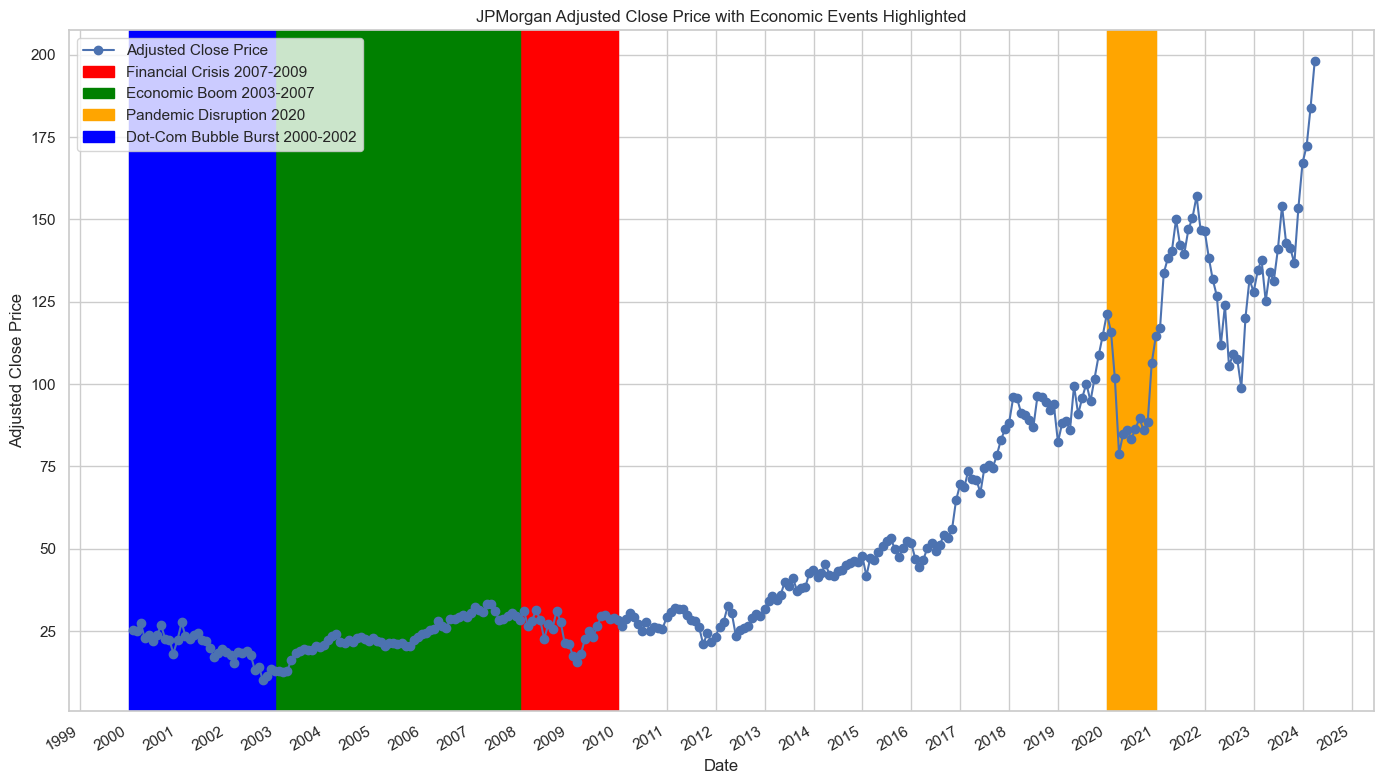

In [293]:

QA\

In [294]:
merged_data.dtypes

date                        datetime64[ns]
open                               float64
high                               float64
low                                float64
close                              float64
adjusted close                     float64
volume                             float64
dividend amount                    float64
cpi_value                          float64
unemployment_value                 float64
retail_sales_value                 float64
federal_funds_rate_value           float64
gdp_value                          float64
treasury_yield_value               float64
durables_value                     float64
nonfarm_payroll_value                int64
dtype: object

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


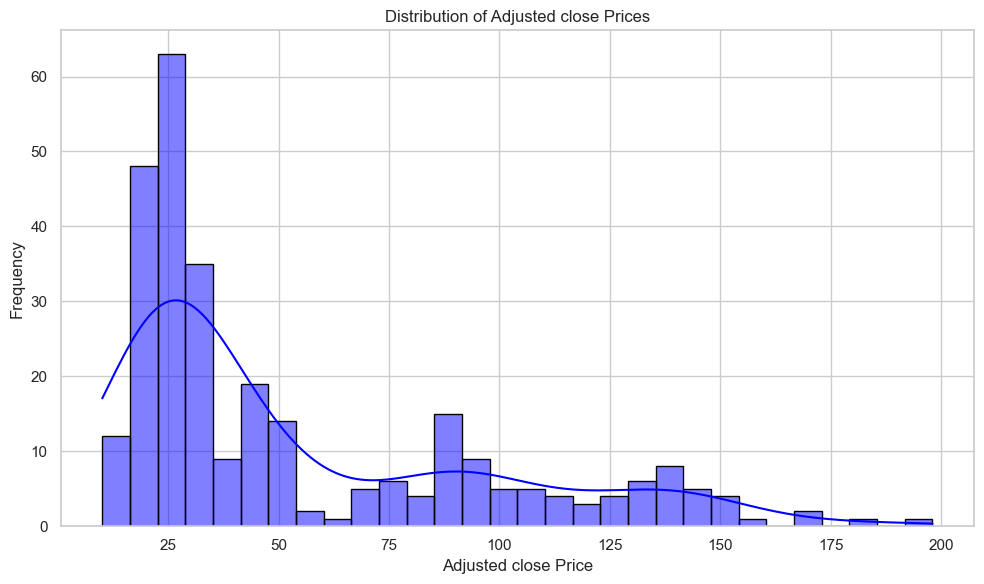

In [296]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define the column to visualize
price_column = 'adjusted close'

# Plot histogram and KDE for the specified column
plt.figure(figsize=(10, 6))
sns.histplot(merged_data[price_column], kde=True, bins=30, color='blue', edgecolor='black')

# Add titles and labels
plt.title(f'Distribution of {price_column.capitalize()} Prices')
plt.xlabel(f'{price_column.capitalize()} Price')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


### Log transformation

### Since the adjusted close price data is right-skewed, applied a log transformation to normalize the data and reduce the skewness.


In [297]:
import numpy as np
merged_data['log_adjusted_close'] = np.log(merged_data['adjusted close'])


In [298]:
merged_data

,date,open,high,low,close,adjusted close,volume,dividend amount,cpi_value,unemployment_value,retail_sales_value,federal_funds_rate_value,gdp_value,treasury_yield_value,durables_value,nonfarm_payroll_value,log_adjusted_close
0,2024-03-31,185.70,200.72,184.27,200.30,198.0176,165873396.0,0.00,312.33,3.8,609462.0,5.33,67672.00,4.21,305526.0,157210,5.288356
1,2024-02-29,173.64,186.43,171.43,186.06,183.9398,154735805.0,0.00,310.33,3.9,555528.0,5.33,67619.00,4.21,268258.0,156551,5.214609
2,2024-01-31,169.09,178.30,164.30,174.36,172.3732,231282257.0,1.05,308.42,3.7,552441.0,5.33,67566.00,4.06,252522.0,155432,5.149662
3,2023-12-31,155.82,170.69,155.82,170.10,167.1379,182856749.0,0.00,306.75,3.7,668957.0,5.33,67513.00,4.02,299969.0,158269,5.118819
4,2023-11-30,139.25,156.13,138.47,156.08,153.3620,162197963.0,0.00,307.05,3.7,619189.0,5.33,67358.67,4.50,286515.0,158347,5.032801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2000-05-31,72.50,77.00,68.13,74.69,23.7060,103784871.0,0.00,171.50,4.0,257581.0,6.27,49851.00,6.44,190188.0,132706,3.165728
287,2000-04-30,87.94,93.00,71.75,72.12,22.8903,99979203.0,0.48,171.30,3.8,239051.0,6.02,49593.00,5.99,186872.0,131749,3.130713
288,2000-03-31,79.88,100.75,77.13,87.19,27.5211,110318738.0,0.00,171.20,4.0,253717.0,5.85,49335.00,6.26,212974.0,130752,3.314953
289,2000-02-29,82.44,86.37,74.56,79.62,25.1316,88645202.0,0.00,169.80,4.1,227087.0,5.73,49317.00,6.52,189153.0,129655,3.224126


### Generating histogram of the log-adjusted close prices to verify that the log transformation has effectively reduced skewness


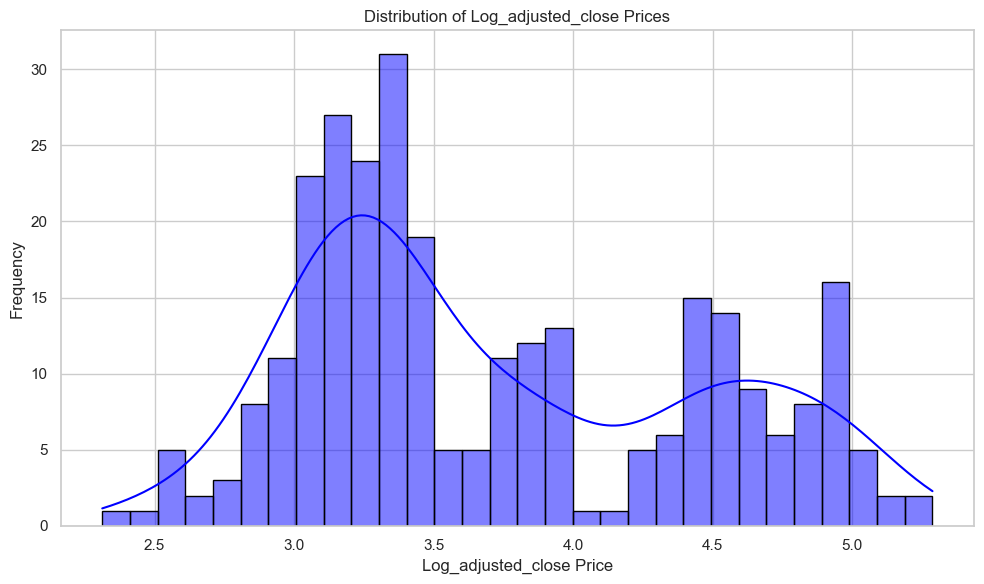

In [299]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define the column to visualize
price_column = 'log_adjusted_close'

# Plot histogram and KDE for the specified column
plt.figure(figsize=(10, 6))
sns.histplot(merged_data[price_column], kde=True, bins=30, color='blue', edgecolor='black')

# Add titles and labels
plt.title(f'Distribution of {price_column.capitalize()} Prices')
plt.xlabel(f'{price_column.capitalize()} Price')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


### Observation: While the log transformation has not achieved a perfect normal distribution, it has successfully reduced the skewness.


In [300]:
import numpy as np

# For log-transformed adjusted close prices
q1_log_adjusted_close = np.percentile(merged_data['log_adjusted_close'], 25)
q3_log_adjusted_close = np.percentile(merged_data['log_adjusted_close'], 75)
iqr_log_adjusted_close = q3_log_adjusted_close - q1_log_adjusted_close

print("IQR for Log-Transformed Adjusted Close: ", iqr_log_adjusted_close)


IQR for Log-Transformed Adjusted Close:  1.2842426373231124


In [301]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1_log_adjusted_close = np.percentile(merged_data['log_adjusted_close'], 25)
q3_log_adjusted_close = np.percentile(merged_data['log_adjusted_close'], 75)

# Calculate IQR
iqr_log_adjusted_close = q3_log_adjusted_close - q1_log_adjusted_close

# Calculate lower and upper bounds
lower_bound = q1_log_adjusted_close - 1.5 * iqr_log_adjusted_close
upper_bound = q3_log_adjusted_close + 1.5 * iqr_log_adjusted_close

# Identify outliers
outliers = merged_data[(merged_data['log_adjusted_close'] < lower_bound) | 
                       (merged_data['log_adjusted_close'] > upper_bound)]

print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)
print("Number of Outliers: ", len(outliers))
print(outliers)


Lower Bound:  1.2370111896136615
Upper Bound:  6.373981738906111
Number of Outliers:  0
Empty DataFrame
Columns: [date, open, high, low, close, adjusted close, volume, dividend amount, cpi_value, unemployment_value, retail_sales_value, federal_funds_rate_value, gdp_value, treasury_yield_value, durables_value, nonfarm_payroll_value, log_adjusted_close]
Index: []


In [ ]:
# Economic indicators

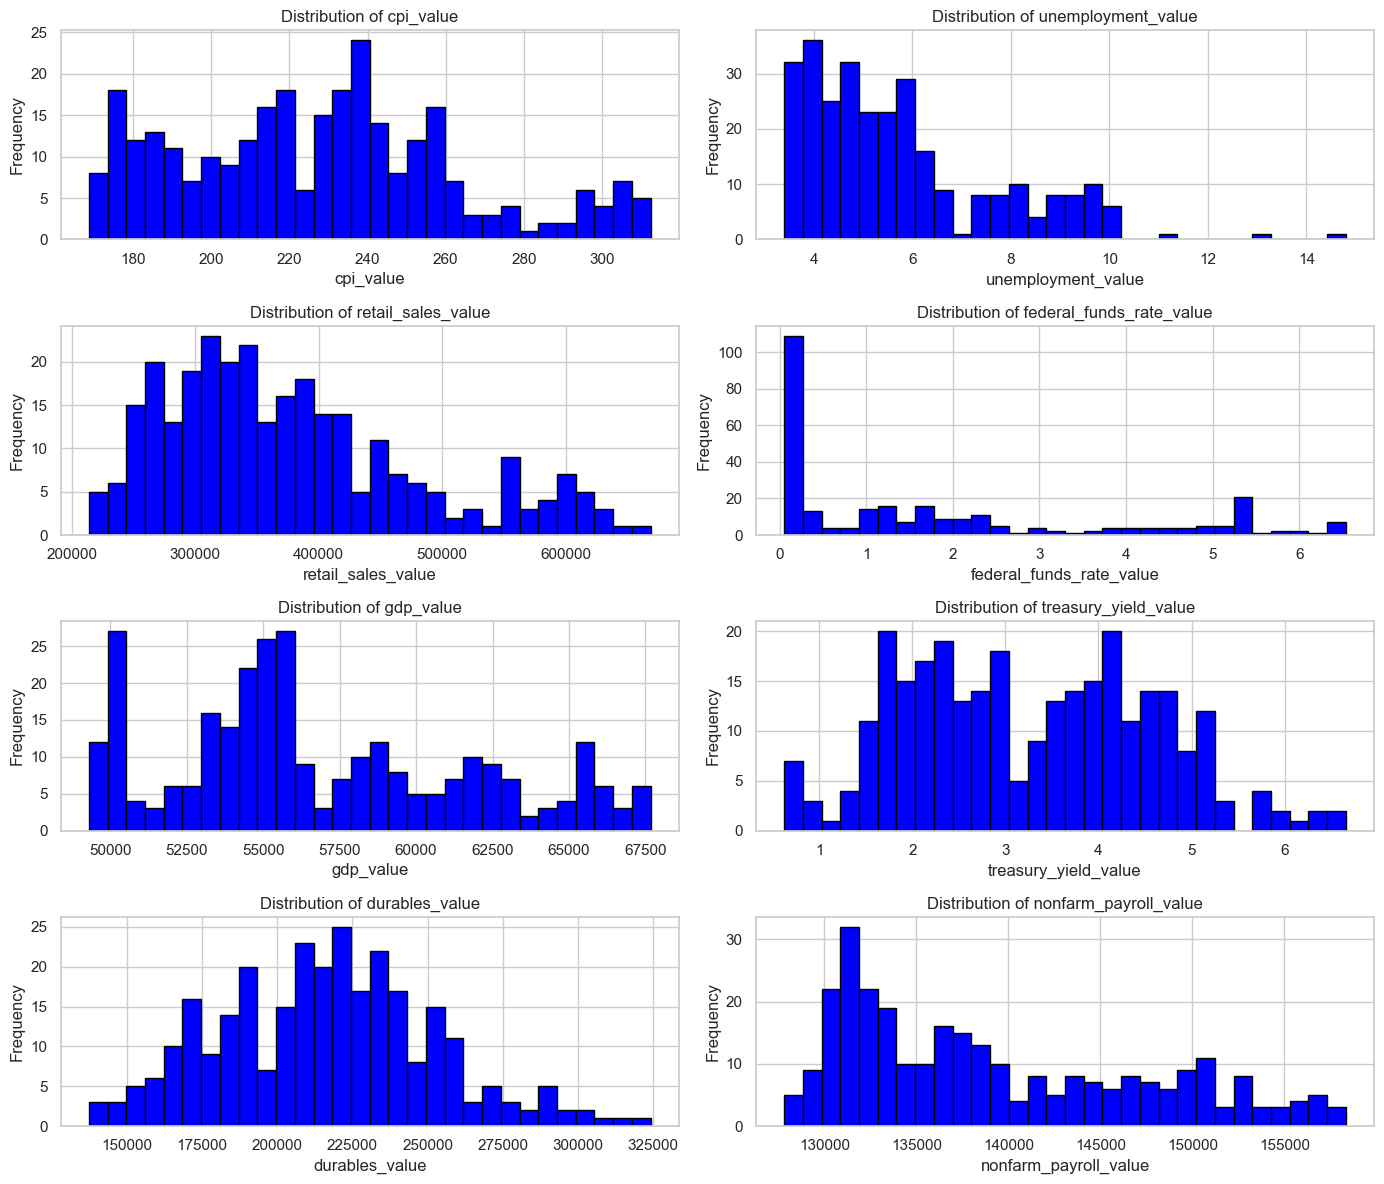

In [302]:
import pandas as pd
import matplotlib.pyplot as plt


# List of economic indicators
economic_indicators = ['cpi_value', 'unemployment_value', 'retail_sales_value',
                       'federal_funds_rate_value', 'gdp_value', 'treasury_yield_value',
                       'durables_value', 'nonfarm_payroll_value']

# Plot histograms for each economic indicator
plt.figure(figsize=(14, 12))

# `enumerate(economic_indicators, 1)` provides both the index (starting from 1) and the value of each economic indicator
# This allows us to place each indicator in the correct subplot position (1 to 8) easily

for i, indicator in enumerate(economic_indicators, 1):      
    plt.subplot(4, 2, i)  # 4 rows, 2 columns for 8 plots
    plt.hist(merged_data[indicator], bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {indicator}')
    plt.xlabel(indicator)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


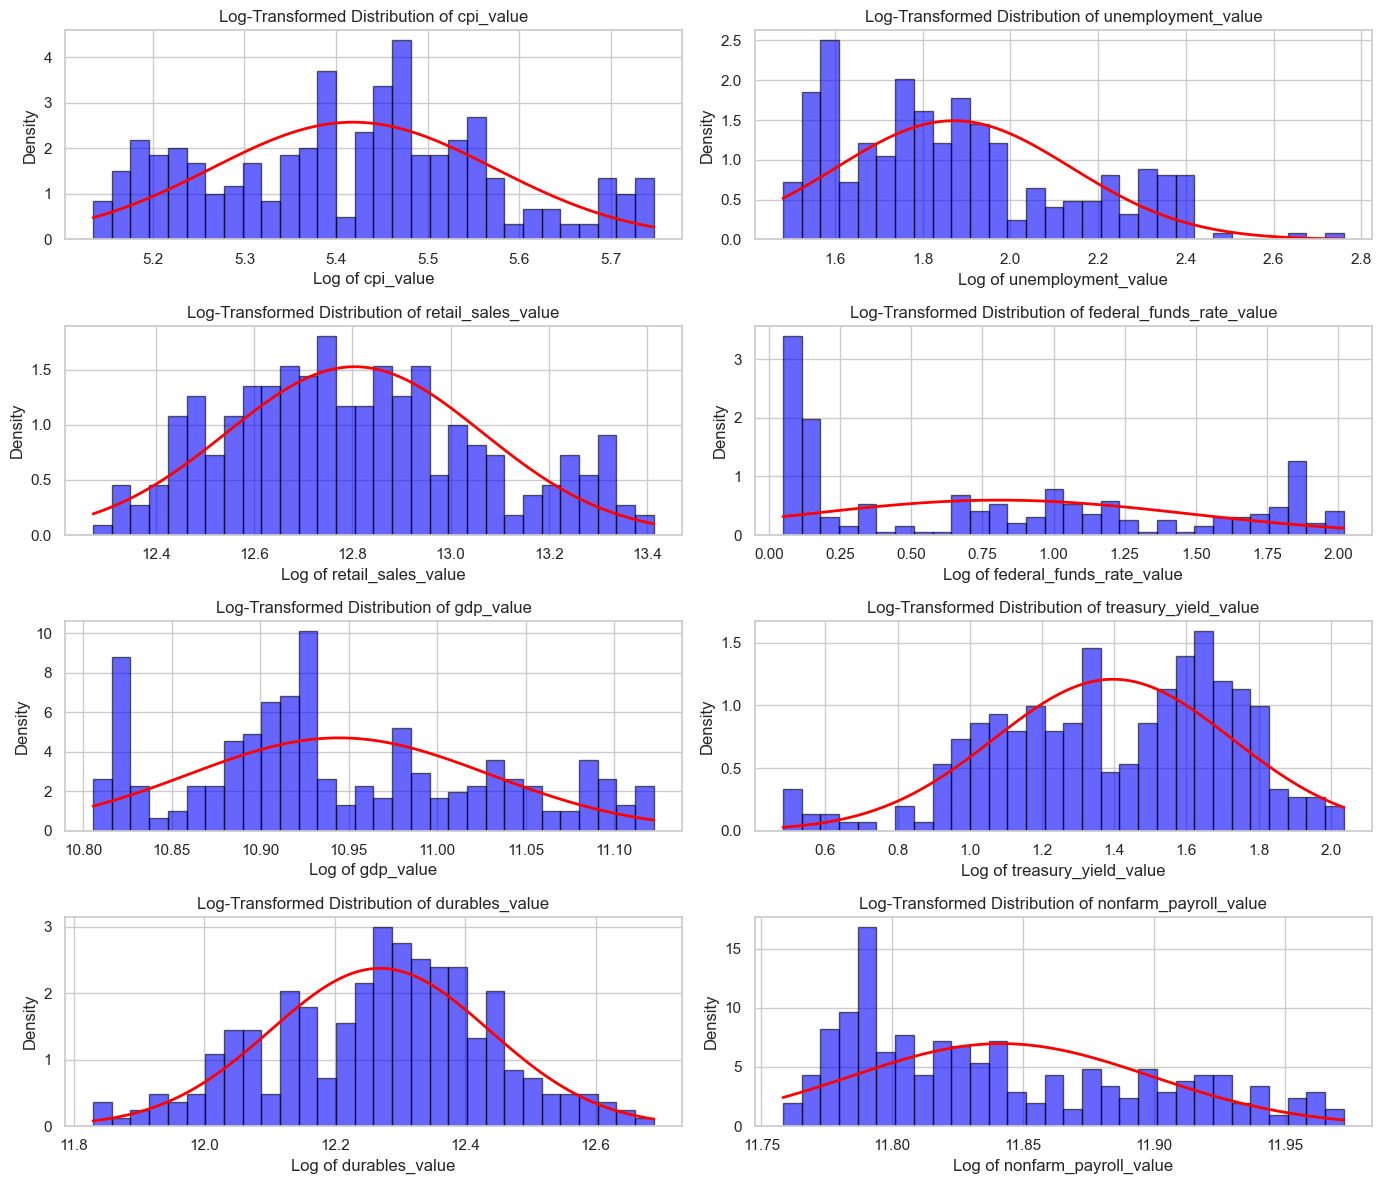

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Apply log transformation to the economic indicators, adding a small constant if needed to avoid log(0)
merged_data_log = merged_data.copy() # merged_data.copy(): Creates a copy of the merged_data dataframe. This ensures that any transformations or modifications applied to merged_data_log won't affect the original merged_data dataframe.


economic_indicators = [
    'cpi_value', 'unemployment_value', 'retail_sales_value',
    'federal_funds_rate_value', 'gdp_value', 'treasury_yield_value',
    'durables_value', 'nonfarm_payroll_value'
]

for indicator in economic_indicators:
    merged_data_log[indicator] = np.log1p(merged_data_log[indicator])  # log1p is log(1 + x), which handles zero values
    
'''
Loop through each indicator: The code iterates through each economic indicator listed in economic_indicators.
Log transformation: For each indicator (e.g., CPI_VALUE), it applies the np.log1p() function to that column of data, which calculates the natural logarithm of 1 + x.

Save the result: The transformed data is then stored back into the merged_data_log DataFrame under the same column name (e.g., merged_data_log['CPI_VALUE']).
 
'''

    
# Plot histograms with bell curve for the log-transformed economic indicators
plt.figure(figsize=(14, 12))

for i, indicator in enumerate(economic_indicators, 1):
    plt.subplot(4, 2, i)  # 4 rows, 2 columns for 8 plots
    
    # Plot the histogram
    plt.hist(merged_data_log[indicator], bins=30, density=True, color='blue', edgecolor='black', alpha=0.6)
    
    # Calculate the mean and standard deviation
    mean = merged_data_log[indicator].mean()
    std_dev = merged_data_log[indicator].std()
    
    # Generate the bell curve
    x = np.linspace(merged_data_log[indicator].min(), merged_data_log[indicator].max(), 100)
    y = norm.pdf(x, mean, std_dev)
    
    # Plot the bell curve
    plt.plot(x, y, color='red', linewidth=2)
    
    plt.title(f'Log-Transformed Distribution of {indicator}')
    plt.xlabel(f'Log of {indicator}')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [304]:
# Apply log transformation to the economic indicators and add them to the merged data
economic_indicators = [
    'cpi_value', 'unemployment_value', 'retail_sales_value',
    'federal_funds_rate_value', 'gdp_value', 'treasury_yield_value',
    'durables_value', 'nonfarm_payroll_value'
]

for indicator in economic_indicators:
    # Create new column name for log-transformed data
    log_col_name = 'log_' + indicator
    
    # Apply log transformation and add the column to merged_data
    merged_data[log_col_name] = np.log1p(merged_data[indicator])

# Display the first few rows to check the new columns
print(merged_data.head())


        date    open    high     low   close  adjusted close       volume  \
0 2024-03-31  185.70  200.72  184.27  200.30        198.0176  165873396.0   
1 2024-02-29  173.64  186.43  171.43  186.06        183.9398  154735805.0   
2 2024-01-31  169.09  178.30  164.30  174.36        172.3732  231282257.0   
3 2023-12-31  155.82  170.69  155.82  170.10        167.1379  182856749.0   
4 2023-11-30  139.25  156.13  138.47  156.08        153.3620  162197963.0   

   dividend amount  cpi_value  unemployment_value  ...  nonfarm_payroll_value  \
0             0.00     312.33                 3.8  ...                 157210   
1             0.00     310.33                 3.9  ...                 156551   
2             1.05     308.42                 3.7  ...                 155432   
3             0.00     306.75                 3.7  ...                 158269   
4             0.00     307.05                 3.7  ...                 158347   

   log_adjusted_close  log_cpi_value  log_unemploy

In [305]:
merged_data

,date,open,high,low,close,adjusted close,volume,dividend amount,cpi_value,unemployment_value,...,nonfarm_payroll_value,log_adjusted_close,log_cpi_value,log_unemployment_value,log_retail_sales_value,log_federal_funds_rate_value,log_gdp_value,log_treasury_yield_value,log_durables_value,log_nonfarm_payroll_value
0,2024-03-31,185.70,200.72,184.27,200.30,198.0176,165873396.0,0.00,312.33,3.8,...,157210,5.288356,5.747257,1.568616,13.320334,1.845300,11.122443,1.650580,12.629793,11.965344
1,2024-02-29,173.64,186.43,171.43,186.06,183.9398,154735805.0,0.00,310.33,3.9,...,156551,5.214609,5.740853,1.589235,13.227676,1.845300,11.121659,1.650580,12.499708,11.961144
2,2024-01-31,169.09,178.30,164.30,174.36,172.3732,231282257.0,1.05,308.42,3.7,...,155432,5.149662,5.734700,1.547563,13.222104,1.845300,11.120875,1.621366,12.439258,11.953970
3,2023-12-31,155.82,170.69,155.82,170.10,167.1379,182856749.0,0.00,306.75,3.7,...,158269,5.118819,5.729288,1.547563,13.413477,1.845300,11.120090,1.613430,12.611438,11.972058
4,2023-11-30,139.25,156.13,138.47,156.08,153.3620,162197963.0,0.00,307.05,3.7,...,158347,5.032801,5.730262,1.547563,13.336167,1.845300,11.117802,1.704748,12.565550,11.972550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2000-05-31,72.50,77.00,68.13,74.69,23.7060,103784871.0,0.00,171.50,4.0,...,132706,3.165728,5.150397,1.609438,12.459093,1.983756,10.816814,2.006871,12.155774,11.795899
287,2000-04-30,87.94,93.00,71.75,72.12,22.8903,99979203.0,0.48,171.30,3.8,...,131749,3.130713,5.149237,1.568616,12.384436,1.948763,10.811625,1.944481,12.138185,11.788661
288,2000-03-31,79.88,100.75,77.13,87.19,27.5211,110318738.0,0.00,171.20,4.0,...,130752,3.314953,5.148657,1.609438,12.443979,1.924249,10.806409,1.982380,12.268930,11.781065
289,2000-02-29,82.44,86.37,74.56,79.62,25.1316,88645202.0,0.00,169.80,4.1,...,129655,3.224126,5.140493,1.629241,12.333093,1.906575,10.806044,2.017566,12.150317,11.772640


## Correlation Analysis

In [306]:
# List of economic indicators (log-transformed)
economic_indicators = [col for col in merged_data.columns if col.startswith('log_') and col != 'log_adjusted_close']

# Calculate correlations with log_adjusted_close
correlations = {}
for indicator in economic_indicators:
    correlation = merged_data['log_adjusted_close'].corr(merged_data[indicator])
    correlations[indicator] = correlation
correlations

{'log_cpi_value': 0.9108279144520807,
 'log_unemployment_value': -0.4248385270303958,
 'log_retail_sales_value': 0.9145816550900777,
 'log_federal_funds_rate_value': -0.06600621665549673,
 'log_gdp_value': 0.955420142386745,
 'log_treasury_yield_value': -0.5223356410907295,
 'log_durables_value': 0.7122852328297034,
 'log_nonfarm_payroll_value': 0.9101236173981181}

In [307]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the correlations dictionary to a DataFrame
correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

correlations_df


'''
This is a dictionary where the keys are the names of the economic indicators (like 'log_CPI', 'log_Unemployment', etc.), and the values are their corresponding correlation coefficients with the log_adjusted_close price.
pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation']):

pd.DataFrame: This is the Pandas function to create a DataFrame.
from_dict:

This is a method to create a DataFrame from a dictionary. It allows you to specify how one wants the dictionary to be converted into the DataFrame.

correlations:

This is the dictionary being converted into the DataFrame.
orient='index':

This argument tells Pandas how to interpret the dictionary keys.
orient='index' means that the dictionary keys (which are the economic indicators) should become the row labels (index) of the DataFrame.
columns=['Correlation']:

This argument specifies the name of the DataFrame's column. In this case, the column will be named 'Correlation', and it will contain the correlation values that were the dictionary's values.
'''

"\nThis is a dictionary where the keys are the names of the economic indicators (like 'log_CPI', 'log_Unemployment', etc.), and the values are their corresponding correlation coefficients with the log_adjusted_close price.\npd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation']):\n\npd.DataFrame: This is the Pandas function to create a DataFrame.\nfrom_dict:\n\nThis is a method to create a DataFrame from a dictionary. It allows you to specify how one wants the dictionary to be converted into the DataFrame.\n\ncorrelations:\n\nThis is the dictionary being converted into the DataFrame.\norient='index':\n\nThis argument tells Pandas how to interpret the dictionary keys.\norient='index' means that the dictionary keys (which are the economic indicators) should become the row labels (index) of the DataFrame.\ncolumns=['Correlation']:\n\nThis argument specifies the name of the DataFrame's column. In this case, the column will be named 'Correlation', and it will contain t

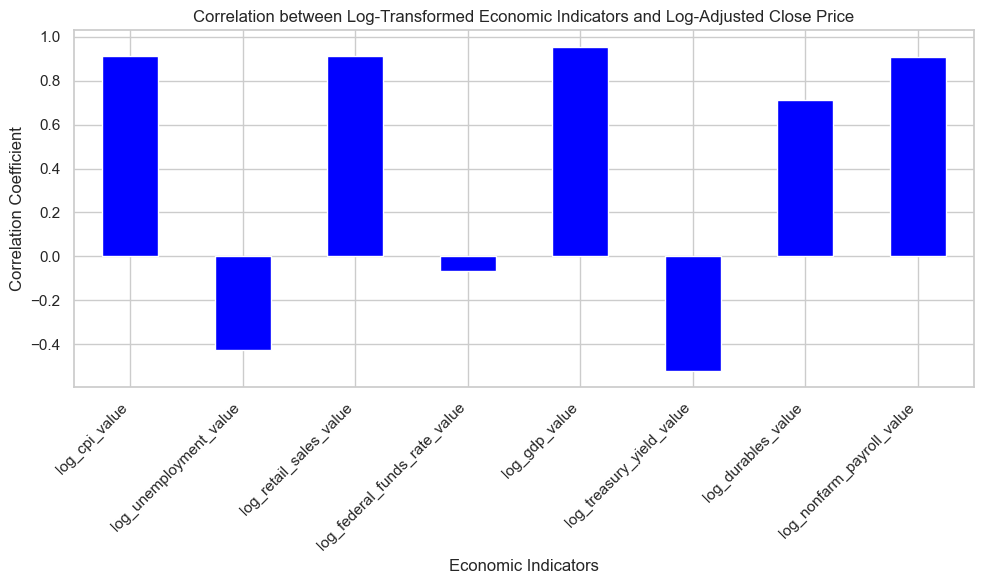

In [308]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
correlations_df['Correlation'].plot(kind='bar', color='blue')

# Adding titles and labels
plt.title('Correlation between Log-Transformed Economic Indicators and Log-Adjusted Close Price')
plt.xlabel('Economic Indicators')
plt.ylabel('Correlation Coefficient')

# Rotating the x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


Based on the correlation analysis, here are some insights:

## Positive Correlations:

log_gdp_per_capita_value (0.9554):

Very Strong Positive Correlation: GDP is highly correlated with the stock prices. This suggests that as the GDP per capita increases, the stock prices also tend to rise.

log_retail_sales_value (0.914582):

Strong Positive Correlation: Retail sales are closely linked to stock prices. Higher consumer spending (indicated by retail sales) often leads to higher revenues for companies, which can drive up stock prices.

log_cpi_value (0.910828):

Strong Positive Correlation: The Consumer Price Index (CPI) is also strongly correlated with stock prices. This might indicate that as prices rise (inflation), stock prices also rise, possibly due to increased nominal earnings or inflationary effects on asset prices.
During periods of inflation, the nominal value of goods and services increases. Companies might report higher revenues and earnings in nominal terms (even if real purchasing power decreases), which can lead to higher stock prices, especially if investors are not fully adjusting for inflation.



log_nonfarm_payroll_value (0.910124):

Strong Positive Correlation: Nonfarm payrolls are closely related to stock prices. A healthy job market suggests strong economic activity, which can boost corporate earnings and, in turn, stock prices.

log_durables_value (0.712285):

Moderate Positive Correlation: Durable goods orders show a moderate positive correlation. This indicates that higher demand for durable goods (like machinery and equipment) tends to coincide with rising stock prices, reflecting economic strength.


## Negative Correlations:
log_federal_funds_rate_value (-0.066006):

Weak Negative Correlation: The federal funds rate shows a weak negative correlation with stock prices. This is expected, as higher interest rates can dampen economic activity and reduce corporate earnings, but the weak correlation suggests other factors may also play a significant role in stock price movements.

log_unemployment_value (-0.424839):

Moderate Negative Correlation: Unemployment has a moderate negative correlation with stock prices, meaning higher unemployment tends to be associated with lower stock prices. This is logical, as higher unemployment can signal economic weakness, reducing consumer spending and corporate profits.

log_treasury_yield_value (-0.522336):

Moderate Negative Correlation: Treasury yields also have a moderate negative correlation with stock prices. Higher yields often indicate higher interest rates, which can lead to lower stock prices as borrowing costs rise and investment shifts from stocks to bonds.

Key Takeaways:
1.GDP, Retail Sales, CPI, and Nonfarm Payrolls are highly correlated with stock prices, suggesting they are important factors in predicting stock price movements.
2.Federal Funds Rate, Unemployment, and Treasury Yields have negative correlations with stock prices, with the latter two showing a moderate relationship. These factors might indicate economic conditions that can depress stock prices.
3.The Durables Value shows a weaker but still significant correlation, indicating its potential impact on stock prices.



'''
However, correlation analysis has limitations:

1. It only measures the strength and direction of a linear relationship between two variables at a time.
2. It does not account for the combined effect of multiple predictors on the dependent variable.

To address these limitations and gain a deeper understanding of the factors influencing weekly sales, I conducted a multiple regression analysis. This method allowed me to:

1.Consider Multiple Predictors Simultaneously: Evaluate the impact of several economic indicators and other variables on weekly sales in one model.
2.Control for Confounding Variables: Isolate the effect of each predictor by accounting for the presence of others.
3. Estimate Coefficients: Determine the specific contribution of each variable to weekly sales.
4. Assess Model Fit: Use metrics like R-squared to evaluate how well the model explains the variation in weekly sales.

'''

In [309]:
merged_data

,date,open,high,low,close,adjusted close,volume,dividend amount,cpi_value,unemployment_value,...,nonfarm_payroll_value,log_adjusted_close,log_cpi_value,log_unemployment_value,log_retail_sales_value,log_federal_funds_rate_value,log_gdp_value,log_treasury_yield_value,log_durables_value,log_nonfarm_payroll_value
0,2024-03-31,185.70,200.72,184.27,200.30,198.0176,165873396.0,0.00,312.33,3.8,...,157210,5.288356,5.747257,1.568616,13.320334,1.845300,11.122443,1.650580,12.629793,11.965344
1,2024-02-29,173.64,186.43,171.43,186.06,183.9398,154735805.0,0.00,310.33,3.9,...,156551,5.214609,5.740853,1.589235,13.227676,1.845300,11.121659,1.650580,12.499708,11.961144
2,2024-01-31,169.09,178.30,164.30,174.36,172.3732,231282257.0,1.05,308.42,3.7,...,155432,5.149662,5.734700,1.547563,13.222104,1.845300,11.120875,1.621366,12.439258,11.953970
3,2023-12-31,155.82,170.69,155.82,170.10,167.1379,182856749.0,0.00,306.75,3.7,...,158269,5.118819,5.729288,1.547563,13.413477,1.845300,11.120090,1.613430,12.611438,11.972058
4,2023-11-30,139.25,156.13,138.47,156.08,153.3620,162197963.0,0.00,307.05,3.7,...,158347,5.032801,5.730262,1.547563,13.336167,1.845300,11.117802,1.704748,12.565550,11.972550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2000-05-31,72.50,77.00,68.13,74.69,23.7060,103784871.0,0.00,171.50,4.0,...,132706,3.165728,5.150397,1.609438,12.459093,1.983756,10.816814,2.006871,12.155774,11.795899
287,2000-04-30,87.94,93.00,71.75,72.12,22.8903,99979203.0,0.48,171.30,3.8,...,131749,3.130713,5.149237,1.568616,12.384436,1.948763,10.811625,1.944481,12.138185,11.788661
288,2000-03-31,79.88,100.75,77.13,87.19,27.5211,110318738.0,0.00,171.20,4.0,...,130752,3.314953,5.148657,1.609438,12.443979,1.924249,10.806409,1.982380,12.268930,11.781065
289,2000-02-29,82.44,86.37,74.56,79.62,25.1316,88645202.0,0.00,169.80,4.1,...,129655,3.224126,5.140493,1.629241,12.333093,1.906575,10.806044,2.017566,12.150317,11.772640


### Regression Analysis

In [310]:
from sklearn.model_selection import train_test_split

# Step 1: Define the dependent variable (log-transformed adjusted close price)
y = merged_data['log_adjusted_close']

# Step 2: Define the independent variables
X = merged_data[['log_cpi_value', 'log_unemployment_value', 'log_retail_sales_value',
                 'log_federal_funds_rate_value', 'log_gdp_value', 'log_treasury_yield_value',
                 'log_durables_value', 'log_nonfarm_payroll_value']]

# Step 3: Split the data into training and testing sets (80% train, 20% test is common)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Add a constant to the model (intercept) for the training set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Step 5: Fit the OLS model on the training data
model = sm.OLS(y_train, X_train).fit()

# Step 6: Print the summary of the model
print(model.summary())

# Step 7: Predict on the test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the model's performance on the test data
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error on Test Data: {mse}')
print(f'R-squared on Test Data: {r2}')


NameError: name 'sm' is not defined

In [311]:
# Checking if the above model is overfitted pr underfitted
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [312]:

# Define the dependent and independent variables
y = merged_data['log_adjusted_close']  # Dependent variable
X = merged_data[['log_cpi_value', 'log_unemployment_value', 'log_retail_sales_value',
                 'log_federal_funds_rate_value', 'log_gdp_value', 'log_treasury_yield_value',
                 'log_durables_value', 'log_nonfarm_payroll_value']]  # Independent variables

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [314]:
# Predict on the training data
y_train_pred = model.predict(X_train)

# Calculate performance metrics on training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training Data - Mean Squared Error: {train_mse}")
print(f"Training Data - R-squared: {train_r2}")


Training Data - Mean Squared Error: 0.03513007633490597
Training Data - R-squared: 0.9302003648758184


In [163]:
# Predict on the test data
y_test_pred = model.predict(X_test)

# Calculate performance metrics on test data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Data - Mean Squared Error: {test_mse}")
print(f"Test Data - R-squared: {test_r2}")


Test Data - Mean Squared Error: 0.049004210126270126
Test Data - R-squared: 0.8973267251024559


In [ ]:
as difference between test and train data for mean square error is low, the model is not overfitted, also the r2 for test data is slightly lower than training data, but the differnce is too low. so the model is best fit


In [ ]:
R-squared (0.928):

This value indicates that 92.8% of the variance in the log_adjusted_close (dependent variable) is explained by the independent variables in your model. This suggests a strong relationship between the predictors and the stock prices.
Adjusted R-squared (0.925):

This is a more accurate version of R-squared that adjusts for the number of predictors in the model. It also indicates a strong relationship, accounting for the number of variables used.
F-statistic (359.2) and Prob (F-statistic):

The F-statistic tests whether at least one of the coefficients in the model is different from zero. A very small p-value (7.86e-123) indicates that the model is statistically significant.
Coefficients (e.g., log_gdp_value = 7.3184):

These represent the expected change in the log_adjusted_close for a one-unit change in each predictor, holding all other variables constant.
For example, a one-unit increase in log_gdp_value is associated with a 7.3184 unit increase in the log_adjusted_close.
P>|t| (p-values):

This tells you whether each predictor is statistically significant. Generally, a p-value less than 0.05 indicates that the predictor is significantly associated with the dependent variable.
Significant predictors include log_unemployment_value, log_gdp_value, and log_durables_value.

Durbin-Watson (2.202):

This value tests for autocorrelation in the residuals. A value close to 2 suggests that there is no autocorrelation, which is a good sign for your model.

Condition Number (3.65e+04):

A high condition number (greater than 30) may indicate multicollinearity issues, where some independent variables are highly correlated. This might require further investigation or model adjustments.

Mean Squared Error on Test Data (0.0526):

This is the average of the squared differences between the predicted and actual values on the test set.
A lower MSE indicates better predictive accuracy.
R-squared on Test Data (0.8913):

The R-squared value on the test data is 0.8913, indicating that the model still explains a high proportion of the variance in the stock prices even when tested on unseen data.
What Do These Results Tell You?
Strong Model Fit: Both the training and test R-squared values are high, indicating that your model explains a significant amount of variance in the stock prices.
Significant Predictors: Variables like log_gdp_value and log_durables_value have a statistically significant impact on the stock prices.
Potential Issues: The high condition number suggests potential multicollinearity, which may need to be addressed by removing or combining some variables.
Overall, your model appears robust, but you might consider additional diagnostics or different models (like Random Forest) if you want to explore non-linear relationships or further improve the predictive power.








In [ ]:
# Steps to fix multicollinearlity, 
step 1: calculating VIF(vARIANCE INFLATION Factor)
step 2: Correlation matrix(correlation between independent varibales)

In [315]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Define the dependent variable (log-transformed adjusted close price)
y = merged_data['log_adjusted_close']

# Step 2: Define the independent variables (excluding non-log-transformed columns and 'date')
X = merged_data[['log_cpi_value', 'log_unemployment_value', 'log_retail_sales_value',
                 'log_federal_funds_rate_value', 'log_gdp_value', 'log_treasury_yield_value',
                 'log_durables_value', 'log_nonfarm_payroll_value']]

# Step 3: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 4: Calculate VIF for each independent variable
# Note: The constant (intercept) will be included in the VIF calculation
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 5: Print the VIF data
print(vif_data)


                       Variable           VIF
0                         const  2.069733e+06
1                 log_cpi_value  5.859748e+01
2        log_unemployment_value  1.527676e+01
3        log_retail_sales_value  1.681463e+01
4  log_federal_funds_rate_value  4.769676e+00
5                 log_gdp_value  5.459162e+01
6      log_treasury_yield_value  4.822027e+00
7            log_durables_value  3.341715e+00
8     log_nonfarm_payroll_value  3.983274e+01


In [ ]:
# Linear Regression Model

In [316]:
import pandas as pd
import statsmodels.api as sm


# Step 1: Define the dependent variable (log-transformed adjusted close price)
y = merged_data['log_adjusted_close']

# Step 2: Define the independent variables (excluding non-log-transformed columns and 'date')
X = merged_data[['log_cpi_value', 'log_unemployment_value', 'log_retail_sales_value',
                 'log_federal_funds_rate_value', 'log_gdp_value', 'log_treasury_yield_value',
                 'log_durables_value', 'log_nonfarm_payroll_value']]

# Step 3: Add a constant to the model (intercept)
X = sm.add_constant(X)

# Step 4: Fit the OLS model
model = sm.OLS(y, X).fit()

# Step 5: Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     log_adjusted_close   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     421.2
Date:                Tue, 20 Aug 2024   Prob (F-statistic):          5.75e-152
Time:                        17:02:07   Log-Likelihood:                 60.852
No. Observations:                 291   AIC:                            -103.7
Df Residuals:                     282   BIC:                            -70.64
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
R-squared (R²): The model explains 92.3% of the variance in the log-adjusted close prices, which is very high, suggesting the model fits the data well.

Adjusted R-squared: The adjusted R² is slightly lower at 0.921, accounting for the number of predictors in the model. This is still very strong, indicating the model is robust.

2. Significant Predictors:
1.log_gdp_value: The coefficient is 5.6760, with a very low p-value (<0.001), indicating a strong positive relationship between GDP and stock prices. This is one of the most significant predictors in the model.
2. log_unemployment_value: The coefficient is -0.4607 with a p-value of 0.008, indicating a statistically significant negative relationship. Higher unemployment tends to decrease stock prices, which is expected.
3. log_retail_sales_value: The coefficient is 0.5072, with a p-value of 0.006, indicating a significant positive relationship.
4. log_treasury_yield_value: The coefficient is -0.2188, with a p-value of 0.005, suggesting a negative relationship. Higher treasury yields are often associated with lower stock prices.
5.log_durables_value: The coefficient is -0.4459, with a p-value of 0.001, indicating a significant negative relationship.

3. Insignificant Predictors:
1.log_cpi_value: Although the correlation was high, in the presence of other variables, its coefficient (0.5867) is not statistically significant (p-value = 0.312).
2.log_federal_funds_rate_value: The p-value is 0.298, indicating no significant impact on stock prices.
3.log_nonfarm_payroll_value: The p-value is 0.488, making it the least significant in the model.
    
4. Potential Issues:
Multicollinearity: The high condition number (3.57e+04) suggests there may be multicollinearity among the predictors, meaning some of the independent variables are highly correlated with each other. This can inflate standard errors and make it difficult to assess the significance of individual predictors.
Durbin-Watson: A value of 0.256 indicates positive autocorrelation in the residuals, which can affect the reliability of the model's estimates.

5. Next Steps:
Check for Multicollinearity: Consider using Variance Inflation Factor (VIF) to assess multicollinearity. If certain variables are highly collinear, you might consider removing or combining them.
Residual Analysis: Plot residuals to check for patterns that might indicate model misspecification or non-constant variance (heteroscedasticity).
Model Refinement: You could explore regularization techniques (like Ridge or Lasso regression) to handle multicollinearity and possibly improve model performance.
Further Testing: Consider cross-validation to ensure that the model generalizes well to new data.
Overall, this regression model provides valuable insights into how different economic indicators affect stock prices, with GDP and unemployment being the most significant predictors.







In [ ]:
In practice, the effect of GDP on stock prices might not be perfectly linear or consistent. Various factors can influence how stock prices respond to changes in GDP:
Economic Conditions: The impact of GDP on stock prices might vary during different economic periods (e.g., recession vs. expansion).
Non-Linearity: The true relationship might be non-linear. For instance, a small change in GDP might have a different impact than a large change.
Other Variables: Other factors (like interest rates or geopolitical events) might influence stock prices and interact with GDP effects.
Model Limitations:

Over-Simplification: Linear regression can oversimplify complex relationships. If the true relationship is more complex (e.g., exponential or polynomial), a linear model might not capture it well.
Assumptions Violation: The model assumes a straight-line relationship, constant variance of residuals, and no autocorrelation, among other things. If these assumptions are violated, the predictions might not be accurate.
Complex Models:

More sophisticated models like polynomial regression, logarithmic transformations, or machine learning algorithms can capture complex relationships better than a simple linear model.
Polynomial Regression: Fits a curve to the data, which can capture non-linear relationships.
Machine Learning Models: Techniques like Random Forest or Gradient Boosting can handle complex and non-linear interactions between variables.
Example
Imagine a scenario where a model predicts stock prices based on GDP:

Linear Model: The model predicts that a $1 increase in GDP always results in a 5.6780 increase in stock prices. This prediction is consistent and straightforward.

Real-World Scenario: In reality, a $1 increase in GDP might lead to a smaller change in stock prices when GDP is already high, or a larger change when GDP is low. Additionally, other factors might amplify or dampen this effect.

In summary, while the coefficient of 5.6780 provides an estimate of the average change in stock prices for a unit change in GDP, this relationship might not be perfectly linear or consistent in all situations. More complex models can help capture and understand these nuances better.








In [124]:
import statsmodels.api as sm

# Define the dependent variable (log-transformed adjusted close price)
y = merged_data['log_adjusted_close']

# Define the independent variables (principal components)
X_pca_df = pca_df[['PC1', 'PC2', 'PC3', 'PC4']]

# Add a constant to the model (intercept)
X_pca = sm.add_constant(X_pca_df)

# Fit the OLS model
model_pca = sm.OLS(y, X_pca).fit()

# Print the summary of the model
print(model_pca.summary())


                            OLS Regression Results                            
Dep. Variable:     log_adjusted_close   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     778.8
Date:                Sat, 17 Aug 2024   Prob (F-statistic):          2.28e-152
Time:                        19:48:31   Log-Likelihood:                 48.467
No. Observations:                 291   AIC:                            -86.93
Df Residuals:                     286   BIC:                            -68.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7263      0.012    307.629      0.0

                              log_cpi_value  log_unemployment_value  \
log_cpi_value                      1.000000               -0.191722   
log_unemployment_value            -0.191722                1.000000   
log_retail_sales_value             0.946811               -0.305928   
log_federal_funds_rate_value      -0.257172               -0.677787   
log_gdp_value                      0.965210               -0.390336   
log_treasury_yield_value          -0.611182               -0.281031   
log_durables_value                 0.725986               -0.449009   
log_nonfarm_payroll_value          0.853446               -0.643712   

                              log_retail_sales_value  \
log_cpi_value                               0.946811   
log_unemployment_value                     -0.305928   
log_retail_sales_value                      1.000000   
log_federal_funds_rate_value               -0.157631   
log_gdp_value                               0.953697   
log_treasury_yield_value

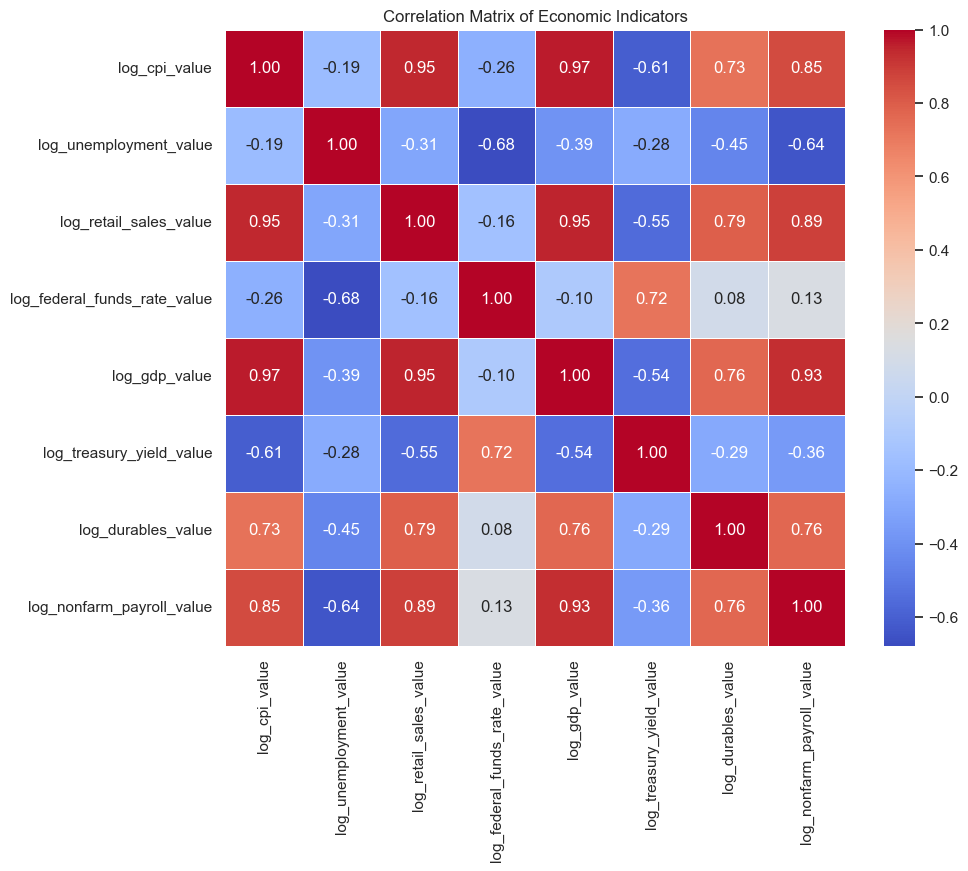

In [318]:
import pandas as pd

# Assuming 'merged_data' is your DataFrame with economic indicators
# List of economic indicators (excluding stock prices)
economic_indicators = [col for col in merged_data.columns if col.startswith('log_') and col != 'log_adjusted_close']

# Calculate correlation matrix of the economic indicators
correlation_matrix = merged_data[economic_indicators].corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Economic Indicators')
plt.show()


In [321]:
# dropping some of the indeprdent variables which are are closely related to each other(using domain knowledge)
import pandas as pd

# Define the columns to include based on domain expertise and multicollinearity analysis
selected_columns = [
    'log_federal_funds_rate_value',
    'log_treasury_yield_value',
    'log_unemployment_value',
    'log_retail_sales_value',
    'log_nonfarm_payroll_value',
    'log_gdp_value',
    'log_adjusted_close'  # Assuming this is your dependent variable
]

# Create a new dataframe with only the selected columns
selected_data = merged_data[selected_columns]

# Display the first few rows to verify the new dataframe
print(selected_data.head())


   log_federal_funds_rate_value  log_treasury_yield_value  \
0                        1.8453                  1.650580   
1                        1.8453                  1.650580   
2                        1.8453                  1.621366   
3                        1.8453                  1.613430   
4                        1.8453                  1.704748   

   log_unemployment_value  log_retail_sales_value  log_nonfarm_payroll_value  \
0                1.568616               13.320334                  11.965344   
1                1.589235               13.227676                  11.961144   
2                1.547563               13.222104                  11.953970   
3                1.547563               13.413477                  11.972058   
4                1.547563               13.336167                  11.972550   

   log_gdp_value  log_adjusted_close  
0      11.122443            5.288356  
1      11.121659            5.214609  
2      11.120875            5.14966

In [322]:
import pandas as pd

# Define the columns to include based on domain expertise and multicollinearity analysis
selected_columns = [
    'log_federal_funds_rate_value',
    'log_treasury_yield_value',
    'log_unemployment_value',
    'log_retail_sales_value',
    'log_nonfarm_payroll_value',
    'log_gdp_value',
    'log_adjusted_close' 
]

y = selected_data['log_adjusted_close']

# Step 2: Define the independent variables
X = selected_data[[ 'log_unemployment_value', 'log_retail_sales_value',
                 'log_federal_funds_rate_value', 'log_gdp_value', 'log_treasury_yield_value',
                 'log_nonfarm_payroll_value']]



# Step 3: Split the data into training and testing sets (80% train, 20% test is common)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Add a constant to the model (intercept) for the training set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Step 5: Fit the OLS model on the training data
model = sm.OLS(y_train, X_train).fit()

# Step 6: Print the summary of the model
print(model.summary())

# Step 7: Predict on the test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the model's performance on the test data
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error on Test Data: {mse}')
print(f'R-squared on Test Data: {r2}')



                            OLS Regression Results                            
Dep. Variable:     log_adjusted_close   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     463.4
Date:                Tue, 20 Aug 2024   Prob (F-statistic):          1.25e-123
Time:                        17:10:23   Log-Likelihood:                 51.294
No. Observations:                 232   AIC:                            -88.59
Df Residuals:                     225   BIC:                            -64.46
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [334]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")


Random Forest - MSE: 0.0103, R²: 0.9786


In [341]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/124.9 MB 5.3 MB/s eta 0:00:24
   ---------------------------------------- 0.3/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 0.5/124.9 MB 3.5 MB/s eta 0:00:36
   ---------------------------------------- 0.6/124.9 MB 3.5 MB/s eta 0:00:36
   ---------------------------------------- 0.7/124.9 MB 3.2 MB/s eta 0:00:39
   ---------------------------------------- 1.2/124.9 MB 4.3 MB/s eta 0:00:29
   ---------------------------------------- 1.5/124.9 MB 4.6 MB/s eta 0:00:27
   ---------------------------------------- 1.5/124.9 MB 4.1 MB/s eta 0:00:31
    ------------------

In [342]:
from xgboost import XGBRegressor

# Define and train the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regressor - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")


XGBoost Regressor - MSE: 0.0108, R²: 0.9776
